# **SYSTEMS BIOLOGY FINAL PROJECT**
## **A MECHANISM FOR ROBUST CIRCADIAN TIMEKEEPING VIA STOICHIOMETRIC BALANCE**

### Spring 2024
### **Team Triple Youngs**: Nayoung Ku (구나영), Seoyoung Kim (김서영), Chaeyoung Park (박채영)

## Import Library & Experimental Data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
mRNA = pd.read_csv('/content/coordinate - mRNA.csv')
mRNA

,x,Per1,x.1,Bmals,x.2,Per2,x.3,Cry1,x.4,Npas2,x.5,Rev-erbs
0,0.0474,0.61558,0.0510,0.66342,0.1416,0.30770,0.0000,0.37795,0.0000,0.96850,0.0369,0.600390
1,4.0768,0.99806,4.0439,0.57098,4.0418,0.70053,4.0496,0.60367,4.1322,0.55616,4.0215,1.000000
2,8.0727,0.94502,8.0456,0.59317,8.0436,0.87852,8.0165,0.82152,8.0992,0.47453,7.9857,0.567251
3,12.0437,0.56838,12.1473,0.91537,11.9776,0.86817,11.9835,0.99738,12.0661,0.62126,11.9854,0.211501
4,16.0301,0.39124,16.2305,0.99611,16.0413,0.30610,16.0331,0.69816,16.1157,0.83096,16.0120,0.295322
5,20.0260,0.33820,20.1459,0.89635,20.0663,0.20823,20.0000,0.52493,20.0826,0.82020,19.9765,0.366472
6,24.0476,0.61850,24.1264,0.64293,24.0705,0.35703,24.0496,0.43570,24.0496,0.99580,24.0382,0.522417
7,28.0740,0.96205,28.1253,0.62854,27.9712,0.74456,28.0165,0.61155,28.0992,0.69107,27.9929,0.933723
8,31.9917,0.89197,32.2030,0.63855,31.9666,0.99947,32.0661,0.89501,32.1488,0.55957,31.9555,0.474659
9,36.0389,0.50560,36.1529,0.98757,35.9231,0.71856,36.1157,0.93176,36.0331,0.56719,35.9634,0.253411


In [ ]:
protein = pd.read_csv('/content/coordinate - Protein.csv')
protein

,x,PER1,x.1,PER2,x.2,CRY1,x.3,CRY2
0,0.0023,0.04160,0.069,0.05236,0.0231,0.00531,-0.0230,0.01589
1,2.0104,0.03872,2.046,0.03397,1.9977,-0.00066,2.0182,-0.00066
2,3.9616,0.00223,4.023,0.00081,4.0008,0.07815,4.0126,0.04371
3,6.0314,0.12097,6.000,0.11128,6.0103,0.25100,6.0286,0.13974
4,8.0295,0.43648,8.023,0.45531,8.0270,0.52981,7.9951,0.41589
5,10.0051,0.84320,10.000,0.87584,10.0279,0.57683,10.0075,0.66821
6,12.0495,1.00033,12.000,1.00376,12.0548,1.00399,12.0181,1.00398
7,14.0457,0.78145,13.977,0.77865,14.0725,0.96492,13.9704,0.90529
8,16.0158,0.58656,16.023,0.60591,16.0466,0.95101,15.9900,0.83973
9,18.0126,0.37888,18.000,0.29490,17.9894,0.14503,18.0170,0.45100


## Models

### Detailed Model

In [ ]:
# Define the system of differential equations
def detailed_model(statevector, t, parameters):

    GR, G, GrR, Gr, GcR, Gc, GBR, GB, GBRb, GBb, MnPo, McPo, MnPt, McPt, MnRt, McRt, MnRev, McRev, MnRo, McRo, MnB, McB, MnNp, McNp, B, Cl, BC, cyrev, revn, cyrevg, revng, cyrevgp, revngp, cyrevp, revnp, gto, x00001, x00011, x00100, x00110, x00200, x00210, x01000, x01010, x01011, x02000, x02010, x02011, x10000, x10100, x20000, x20010, x20011, x20100, x20110, x20111, x21000, x21010, x21011, x21100, x21110, x21111, x22000, x22010, x22011, x22100, x22110, x22111, x30000, x30100, x30200, x30300, x40000, x40010, x40011, x40100, x40110, x40111, x40200, x40210, x40211, x40300, x40310, x40311, x41000, x41010, x41011, x41100, x41110, x41111, x41200, x41210, x41211, x41300, x41310, x41311, x42000, x42010, x42011, x42100, x42110, x42111, x42200, x42210, x42211, x42300, x42310, x42311, x50000, x50010, x50011, x50100, x50110, x50111, x50200, x50210, x50211, x50300, x50310, x50311, x51000, x51010, x51011, x51100, x51110, x51111, x51200, x51210, x51211, x51300, x51310, x51311, x52000, x52010, x52011, x52100, x52110, x52111, x52200, x52210, x52211, x52300, x52310, x52311, x60000, x60010, x60011, x60100, x60110, x60111, x60200, x60210, x60211, x60300, x60310, x60311, x61000, x61010, x61011, x61100, x61110, x61111, x61200, x61210, x61211, x61300, x61310, x61311, x62000, x62010, x62011, x62100, x62110, x62111, x62200, x62210, x62211, x62300, x62310, x62311 = statevector

    trPo, trPt, trRo, trRt, trB, trRev, trNp, tlp, tlr, tlb, tlrev, tlc, tlnp, agp, dg, ac, dc, ar, dr, cbin, uncbin, bbin, unbbin, cbbin, uncbbin, ag, bin, unbin, binrev, unbinrev, binr, unbinr, binc, unbinc, binrevb, unbinrevb, tmc, tmcrev, nl, ne, nlrev, nerev, lne, nlbc, hoo, hto, phos, lono, lont, lta, ltb, trgto, ugto, Nf, up, uro, urt, umNp, umPo, umPt, umRo, umRt, ub, uc, ubc, upu, urev, uprev, umB, umRev = parameters
    #bbin, unbbin, cbbin, uncbbin = 6.926, 0.13, 6.599, 0.304  #(Chen et al, 2009)
    #Ct, hoo, hto = 57.61, 0.527, 2.456  #(Lee et al, 2001)
    #umPo, umPt, umRo, umRt = 0.765, 0.589, 0.493, 0.456 #(Siepka et al, 2007)
    #umB = 0.795 #(Suter et al, 2011)
    #umRev = 1.51 #(Chawla & Lazar, 1993)
    #upu = 0.07 #(Lee et al, 2009)
    #up = 3.537 #(Meng et al, 2008)
    #uro = 0.174 #(Siepka et al, 2007)
    #urt = 0.482 #(Busino et al, 2007; Chen et al, 2009)
    #ub,uc, ubc = 0.019, 0.025, 0.349 #(Kwon et al, 2006)
    #urev, uprev = 1.649, 0.517 #(Suter et al, 2011)
    #Nf = 3.351 #(Miller et al, 1989)
    #lono, lont = 0.206, 0.396 #(Challet et al, 2003)
    #ltI, lta, ltb = 500, 0.607, 0.013 #(Kronauer et al, 1999)

    # Differential equations
    GR_dot = -(unbin*GR)+bin*(1-G-GR)*(x01011+x02011) # Promoter Activity # E-box
    G_dot = -(unbin*G)+bin*(1-G-GR)*x00011
    GrR_dot = -(unbinr*GrR)+binr*(1-Gr-GrR)*(x01011+x02011)
    Gr_dot = -(unbinr*Gr)+binr*(1-Gr-GrR)*x00011
    GcR_dot = -(unbinc*GcR)+binc*(1-Gc-GcR)*(x01011+x02011)
    Gc_dot = -(unbinc*Gc)+binc*(1-Gc-GcR)*x00011

    GBR_dot = -(unbinrev*GBR)+binrev*GB*(revn+revng+revngp+revnp) # RORE
    GB_dot = unbinrev*GBR-binrev*GB*(revn+revng+revngp+revnp)
    GBRb_dot = -(unbinrevb*GBRb)+binrevb*GBb*(revn+revng+revngp+revnp)
    GBb_dot = unbinrevb*GBRb-binrevb*GBb*(revn+revng+revngp+revnp)


    MnPo_dot = trPo*G-tmc*MnPo-umPo*MnPo # Transcription
    McPo_dot = -(umPo*McPo)+tmc*MnPo
    MnPt_dot = trPt*G-tmc*MnPt-umPt*MnPt
    McPt_dot = -(umPt*McPt)+tmc*MnPt
    MnRt_dot = trRt*Gc-tmc*MnRt-umRt*MnRt
    McRt_dot = -(umRt*McRt)+tmc*MnRt
    MnRev_dot = -(tmcrev*MnRev)-umRev*MnRev+trRev*Gr*x00011
    McRev_dot = -(umRev*McRev)+tmcrev*MnRev
    MnRo_dot = trRo*G*GB-tmc*MnRo-umRo*MnRo
    McRo_dot = -(umRo*McRo)+tmc*MnRo
    MnB_dot = trB*GBb-tmc*MnB-umB*MnB
    McB_dot = -(umB*McB)+tmc*MnB
    MnNp_dot = trNp*GB-tmc*MnNp-umNp*MnNp
    McNp_dot = -(umNp*McNp)+tmc*MnNp


    B_dot = -(ub*B)+uncbin*BC-cbin*B*Cl+tlb*McB #Secondary Loop
    Cl_dot = tlc+uncbin*BC-uc*Cl-cbin*B*Cl+tlnp*McNp
    BC_dot = -(phos*BC)-ubc*BC-uncbin*BC+cbin*B*Cl
    cyrev_dot = -((nlrev+urev)*cyrev)+dg*cyrevg+tlrev*McRev+nerev*revn-ag*cyrev*x00200
    revn_dot = nlrev*cyrev+(-nerev-urev)*revn+dg*revng-ag*Nf*revn*x00210
    cyrevg_dot = -(cyrevg*(dg+nlrev+urev+gto))+nerev*revng+ag*cyrev*x00200
    revng_dot = nlrev*cyrevg-(dg+nerev+urev+gto)*revng+ag*Nf*revn*x00210
    cyrevgp_dot = -((dg+nlrev+uprev)*cyrevgp)+cyrevg*gto+nerev*revngp
    revngp_dot = nlrev*cyrevgp+gto*revng-(dg+nerev+uprev)*revngp
    cyrevp_dot = dg*cyrevgp-(nlrev+uprev)*cyrevp+nerev*revnp
    revnp_dot = nlrev*cyrevp+dg*revngp-(nerev+uprev)*revnp
    gto_dot = trgto*G*GB-ugto*gto

    x00001_dot = phos*BC-nlbc*x00001-ubc*x00001
    x00011_dot = nlbc*x00001-ubc*x00011+uro*x01011-cbbin*Nf*x00011*(x01010+x02010)+urt*x02011+uncbbin*(x01011+x02011)+upu*(x50011+x50111+x50211+x50311)+up*(x20011+x20111+x40011+x40111+x40211+x40311+x60011+x60111+x60211+x60311)-bbin*Nf*x00011*(x20010+x20110+x21010+x21110+x22010+x22110+x40010+x40110+x40210+x40310+x41010+x41110+x41210+x41310+x42010+x42110+x42210+x42310+x50010+x50110+x50210+x50310+x51010+x51110+x51210+x51310+x52010+x52110+x52210+x52310+x60010+x60110+x60210+x60310+x61010+x61110+x61210+x61310+x62010+x62110+x62210+x62310)+unbbin*(x20011+x20111+x21011+x21111+x22011+x22111+x40011+x40111+x40211+x40311+x41011+x41111+x41211+x41311+x42011+x42111+x42211+x42311+x50011+x50111+x50211+x50311+x51011+x51111+x51211+x51311+x52011+x52111+x52211+x52311+x60011+x60111+x60211+x60311+x61011+x61111+x61211+x61311+x62011+x62111+x62211+x62311)
    x00100_dot = lne*x00110+upu*(x10100+x30100+x30300+x50100+x50300)+up*(x20100+x40100+x40300+x60100+x60300)-ac*x00100*(x10000+x20000+x21000+x22000+x30000+x40000+x41000+x42000+x50000+x51000+x52000+x60000+x61000+x62000)+dc*(x10100+x20100+x21100+x22100+x30100+x40100+x41100+x42100+x50100+x51100+x52100+x60100+x61100+x62100)-ac*x00100*(x30200+x40200+x41200+x42200+x50200+x51200+x52200+x60200+x61200+x62200)+dc*(x30300+x40300+x41300+x42300+x50300+x51300+x52300+x60300+x61300+x62300)
    x00110_dot = -(lne*x00110)+upu*(x50110+x50111+x50310+x50311)+up*(x20110+x20111+x40110+x40111+x40310+x40311+x60110+x60111+x60310+x60311)-ac*Nf*x00110*(x20010+x21010+x22010+x40010+x41010+x42010+x50010+x51010+x52010+x60010+x61010+x62010)-ac*Nf*x00110*(x20011+x21011+x22011+x40011+x41011+x42011+x50011+x51011+x52011+x60011+x61011+x62011)+dc*(x20110+x21110+x22110+x40110+x41110+x42110+x50110+x51110+x52110+x60110+x61110+x62110)+dc*(x20111+x21111+x22111+x40111+x41111+x42111+x50111+x51111+x52111+x60111+x61111+x62111)-ac*Nf*x00110*(x40210+x41210+x42210+x50210+x51210+x52210+x60210+x61210+x62210)-ac*Nf*x00110*(x40211+x41211+x42211+x50211+x51211+x52211+x60211+x61211+x62211)+dc*(x40310+x41310+x42310+x50310+x51310+x52310+x60310+x61310+x62310)+dc*(x40311+x41311+x42311+x50311+x51311+x52311+x60311+x61311+x62311)
    x00200_dot = dg*cyrevg+urev*cyrevg+dg*cyrevgp+uprev*cyrevgp-ag*cyrev*x00200+lne*x00210+upu*(x30200+x30300+x50200+x50300)+up*(x40200+x40300+x60200+x60300)-agp*x00200*(x30000+x30100+x40000+x40100+x41000+x41100+x42000+x42100+x50000+x50100+x51000+x51100+x52000+x52100+x60000+x60100+x61000+x61100+x62000+x62100)+dg*(x30200+x30300+x40200+x40300+x41200+x41300+x42200+x42300+x50200+x50300+x51200+x51300+x52200+x52300+x60200+x60300+x61200+x61300+x62200+x62300)
    x00210_dot = dg*revng+urev*revng+dg*revngp+uprev*revngp-lne*x00210-ag*Nf*revn*x00210+upu*(x50210+x50211+x50310+x50311)+up*(x40210+x40211+x40310+x40311+x60210+x60211+x60310+x60311)-agp*Nf*x00210*(x40010+x40011+x40110+x40111+x41010+x41011+x41110+x41111+x42010+x42011+x42110+x42111+x50010+x50011+x50110+x50111+x51010+x51011+x51110+x51111+x52010+x52011+x52110+x52111+x60010+x60011+x60110+x60111+x61010+x61011+x61110+x61111+x62010+x62011+x62110+x62111)+dg*(x40210+x40211+x40310+x40311+x41210+x41211+x41310+x41311+x42210+x42211+x42310+x42311+x50210+x50211+x50310+x50311+x51210+x51211+x51310+x51311+x52210+x52211+x52310+x52311+x60210+x60211+x60310+x60311+x61210+x61211+x61310+x61311+x62210+x62211+x62310+x62311)
    x01000_dot = tlr*McRo-uro*x01000-ar*x01000*(x20000+x20100+x40000+x40100+x40200+x40300+x50000+x50100+x50200+x50300+x60000+x60100+x60200+x60300)+dr*(x21000+x21100+x41000+x41100+x41200+x41300+x51000+x51100+x51200+x51300+x61000+x61100+x61200+x61300)
    x01010_dot = -(uro*x01010)-cbbin*Nf*x00011*x01010+uncbbin*x01011-ar*Nf*x01010*(x20010+x20110+x40010+x40110+x40210+x40310+x50010+x50110+x50210+x50310+x60010+x60110+x60210+x60310)-ar*Nf*x01010*(x20011+x20111+x40011+x40111+x40211+x40311+x50011+x50111+x50211+x50311+x60011+x60111+x60211+x60311)+dr*(x21010+x21110+x41010+x41110+x41210+x41310+x51010+x51110+x51210+x51310+x61010+x61110+x61210+x61310)+dr*(x21011+x21111+x41011+x41111+x41211+x41311+x51011+x51111+x51211+x51311+x61011+x61111+x61211+x61311)
    x01011_dot = cbbin*Nf*x00011*x01010-uncbbin*x01011-uro*x01011-ar*Nf*x01011*(x20010+x20110+x40010+x40110+x40210+x40310+x50010+x50110+x50210+x50310+x60010+x60110+x60210+x60310)+dr*(x21011+x21111+x41011+x41111+x41211+x41311+x51011+x51111+x51211+x51311+x61011+x61111+x61211+x61311)
    x02000_dot = tlr*McRt-urt*x02000-ar*x02000*(x20000+x20100+x40000+x40100+x40200+x40300+x50000+x50100+x50200+x50300+x60000+x60100+x60200+x60300)+dr*(x22000+x22100+x42000+x42100+x42200+x42300+x52000+x52100+x52200+x52300+x62000+x62100+x62200+x62300)
    x02010_dot = -(urt*x02010)-cbbin*Nf*x00011*x02010+uncbbin*x02011-ar*Nf*x02010*(x20010+x20110+x40010+x40110+x40210+x40310+x50010+x50110+x50210+x50310+x60010+x60110+x60210+x60310)-ar*Nf*x02010*(x20011+x20111+x40011+x40111+x40211+x40311+x50011+x50111+x50211+x50311+x60011+x60111+x60211+x60311)+dr*(x22010+x22110+x42010+x42110+x42210+x42310+x52010+x52110+x52210+x52310+x62010+x62110+x62210+x62310)+dr*(x22011+x22111+x42011+x42111+x42211+x42311+x52011+x52111+x52211+x52311+x62011+x62111+x62211+x62311)
    x02011_dot = cbbin*Nf*x00011*x02010-uncbbin*x02011-urt*x02011-ar*Nf*x02011*(x20010+x20110+x40010+x40110+x40210+x40310+x50010+x50110+x50210+x50310+x60010+x60110+x60210+x60310)+dr*(x22011+x22111+x42011+x42111+x42211+x42311+x52011+x52111+x52211+x52311+x62011+x62111+x62211+x62311)
    x10000_dot = tlp*McPo-upu*x10000-ac*x00100*x10000+dc*x10100
    x10100_dot = ac*x00100*x10000-dc*x10100-hoo*x10100-upu*x10100
    x20000_dot = -(nl*x20000)-up*x20000-ac*x00100*x20000-ar*(x01000+x02000)*x20000+ne*x20010+dc*x20100+dr*(x21000+x22000)
    x20010_dot = nl*x20000-ne*x20010-up*x20010-bbin*Nf*x00011*x20010-ac*Nf*x00110*x20010-ar*Nf*(x01010+x02010)*x20010-ar*Nf*(x01011+x02011)*x20010+ubc*x20011+unbbin*x20011+dc*x20110+dr*(x21010+x22010)+dr*(x21011+x22011)
    x20011_dot = bbin*Nf*x00011*x20010-ubc*x20011-unbbin*x20011-up*x20011-ac*Nf*x00110*x20011-ar*Nf*(x01010+x02010)*x20011+dc*x20111+dr*(x21011+x22011)
    x20100_dot = hoo*x10100+ac*x00100*x20000-dc*x20100-nl*x20100-up*x20100-ar*(x01000+x02000)*x20100+ne*x20110+dr*(x21100+x22100)
    x20110_dot = ac*Nf*x00110*x20010+nl*x20100-dc*x20110-ne*x20110-up*x20110-bbin*Nf*x00011*x20110-ar*Nf*(x01010+x02010)*x20110-ar*Nf*(x01011+x02011)*x20110+ubc*x20111+unbbin*x20111+dr*(x21110+x22110)+dr*(x21111+x22111)
    x20111_dot = ac*Nf*x00110*x20011+bbin*Nf*x00011*x20110-dc*x20111-ubc*x20111-unbbin*x20111-up*x20111-ar*Nf*(x01010+x02010)*x20111+dr*(x21111+x22111)
    x21000_dot = ar*x01000*x20000-dr*x21000-nl*x21000-ac*x00100*x21000+ne*x21010+dc*x21100
    x21010_dot = ar*Nf*x01010*x20010+nl*x21000-dr*x21010-ne*x21010-bbin*Nf*x00011*x21010-ac*Nf*x00110*x21010+unbbin*x21011+dc*x21110
    x21011_dot = ar*Nf*x01011*x20010+ar*Nf*x01010*x20011+bbin*Nf*x00011*x21010-2*dr*x21011-unbbin*x21011-ac*Nf*x00110*x21011+dc*x21111
    x21100_dot = ar*x01000*x20100+ac*x00100*x21000-dc*x21100-dr*x21100-nl*x21100+ne*x21110
    x21110_dot = ar*Nf*x01010*x20110+ac*Nf*x00110*x21010+nl*x21100-dc*x21110-dr*x21110-ne*x21110-bbin*Nf*x00011*x21110+unbbin*x21111
    x21111_dot = ar*Nf*x01011*x20110+ar*Nf*x01010*x20111+ac*Nf*x00110*x21011+bbin*Nf*x00011*x21110-dc*x21111-2*dr*x21111-unbbin*x21111
    x22000_dot = ar*x02000*x20000-dr*x22000-nl*x22000-ac*x00100*x22000+ne*x22010+dc*x22100
    x22010_dot = ar*Nf*x02010*x20010+nl*x22000-dr*x22010-ne*x22010-bbin*Nf*x00011*x22010-ac*Nf*x00110*x22010+unbbin*x22011+dc*x22110
    x22011_dot = ar*Nf*x02011*x20010+ar*Nf*x02010*x20011+bbin*Nf*x00011*x22010-2*dr*x22011-unbbin*x22011-ac*Nf*x00110*x22011+dc*x22111
    x22100_dot = ar*x02000*x20100+ac*x00100*x22000-dc*x22100-dr*x22100-nl*x22100+ne*x22110
    x22110_dot = ar*Nf*x02010*x20110+ac*Nf*x00110*x22010+nl*x22100-dc*x22110-dr*x22110-ne*x22110-bbin*Nf*x00011*x22110+unbbin*x22111
    x22111_dot = ar*Nf*x02011*x20110+ar*Nf*x02010*x20111+ac*Nf*x00110*x22011+bbin*Nf*x00011*x22110-dc*x22111-2*dr*x22111-unbbin*x22111
    x30000_dot = tlp*McPt-upu*x30000-ac*x00100*x30000-agp*x00200*x30000+dc*x30100+dg*x30200
    x30100_dot = ac*x00100*x30000-dc*x30100-hto*x30100-upu*x30100-agp*x00200*x30100+dg*x30300
    x30200_dot = agp*x00200*x30000-dg*x30200-upu*x30200-gto*x30200-ac*x00100*x30200+dc*x30300
    x30300_dot = agp*x00200*x30100+ac*x00100*x30200-dc*x30300-dg*x30300-hto*x30300-upu*x30300-gto*x30300
    x40000_dot = -(nl*x40000)-up*x40000-ac*x00100*x40000-agp*x00200*x40000-ar*(x01000+x02000)*x40000+ne*x40010+dc*x40100+dg*x40200+dr*(x41000+x42000)
    x40010_dot = nl*x40000-ne*x40010-up*x40010-bbin*Nf*x00011*x40010-ac*Nf*x00110*x40010-agp*Nf*x00210*x40010-ar*Nf*(x01010+x02010)*x40010-ar*Nf*(x01011+x02011)*x40010+ubc*x40011+unbbin*x40011+dc*x40110+dg*x40210+dr*(x41010+x42010)+dr*(x41011+x42011)
    x40011_dot = bbin*Nf*x00011*x40010-ubc*x40011-unbbin*x40011-up*x40011-ac*Nf*x00110*x40011-agp*Nf*x00210*x40011-ar*Nf*(x01010+x02010)*x40011+dc*x40111+dg*x40211+dr*(x41011+x42011)
    x40100_dot = hto*x30100+ac*x00100*x40000-dc*x40100-nl*x40100-up*x40100-agp*x00200*x40100-ar*(x01000+x02000)*x40100+ne*x40110+dg*x40300+dr*(x41100+x42100)
    x40110_dot = ac*Nf*x00110*x40010+nl*x40100-dc*x40110-ne*x40110-up*x40110-bbin*Nf*x00011*x40110-agp*Nf*x00210*x40110-ar*Nf*(x01010+x02010)*x40110-ar*Nf*(x01011+x02011)*x40110+ubc*x40111+unbbin*x40111+dg*x40310+dr*(x41110+x42110)+dr*(x41111+x42111)
    x40111_dot = ac*Nf*x00110*x40011+bbin*Nf*x00011*x40110-dc*x40111-ubc*x40111-unbbin*x40111-up*x40111-agp*Nf*x00210*x40111-ar*Nf*(x01010+x02010)*x40111+dg*x40311+dr*(x41111+x42111)
    x40200_dot = agp*x00200*x40000-dg*x40200-nl*x40200-up*x40200-gto*x40200-ac*x00100*x40200-ar*(x01000+x02000)*x40200+ne*x40210+dc*x40300+dr*(x41200+x42200)
    x40210_dot = agp*Nf*x00210*x40010+nl*x40200-dg*x40210-ne*x40210-up*x40210-gto*x40210-bbin*Nf*x00011*x40210-ac*Nf*x00110*x40210-ar*Nf*(x01010+x02010)*x40210-ar*Nf*(x01011+x02011)*x40210+ubc*x40211+unbbin*x40211+dc*x40310+dr*(x41210+x42210)+dr*(x41211+x42211)
    x40211_dot = agp*Nf*x00210*x40011+bbin*Nf*x00011*x40210-dg*x40211-ubc*x40211-unbbin*x40211-up*x40211-gto*x40211-ac*Nf*x00110*x40211-ar*Nf*(x01010+x02010)*x40211+dc*x40311+dr*(x41211+x42211)
    x40300_dot = hto*x30300+agp*x00200*x40100+ac*x00100*x40200-dc*x40300-dg*x40300-nl*x40300-up*x40300-gto*x40300-ar*(x01000+x02000)*x40300+ne*x40310+dr*(x41300+x42300)
    x40310_dot = agp*Nf*x00210*x40110+ac*Nf*x00110*x40210+nl*x40300-dc*x40310-dg*x40310-ne*x40310-up*x40310-gto*x40310-bbin*Nf*x00011*x40310-ar*Nf*(x01010+x02010)*x40310-ar*Nf*(x01011+x02011)*x40310+ubc*x40311+unbbin*x40311+dr*(x41310+x42310)+dr*(x41311+x42311)
    x40311_dot = agp*Nf*x00210*x40111+ac*Nf*x00110*x40211+bbin*Nf*x00011*x40310-dc*x40311-dg*x40311-ubc*x40311-unbbin*x40311-up*x40311-gto*x40311-ar*Nf*(x01010+x02010)*x40311+dr*(x41311+x42311)
    x41000_dot = ar*x01000*x40000-dr*x41000-nl*x41000-ac*x00100*x41000-agp*x00200*x41000+ne*x41010+dc*x41100+dg*x41200
    x41010_dot = ar*Nf*x01010*x40010+nl*x41000-dr*x41010-ne*x41010-bbin*Nf*x00011*x41010-ac*Nf*x00110*x41010-agp*Nf*x00210*x41010+unbbin*x41011+dc*x41110+dg*x41210
    x41011_dot = ar*Nf*x01011*x40010+ar*Nf*x01010*x40011+bbin*Nf*x00011*x41010-2*dr*x41011-unbbin*x41011-ac*Nf*x00110*x41011-agp*Nf*x00210*x41011+dc*x41111+dg*x41211
    x41100_dot = ar*x01000*x40100+ac*x00100*x41000-dc*x41100-dr*x41100-nl*x41100-agp*x00200*x41100+ne*x41110+dg*x41300
    x41110_dot = ar*Nf*x01010*x40110+ac*Nf*x00110*x41010+nl*x41100-dc*x41110-dr*x41110-ne*x41110-bbin*Nf*x00011*x41110-agp*Nf*x00210*x41110+unbbin*x41111+dg*x41310
    x41111_dot = ar*Nf*x01011*x40110+ar*Nf*x01010*x40111+ac*Nf*x00110*x41011+bbin*Nf*x00011*x41110-dc*x41111-2*dr*x41111-unbbin*x41111-agp*Nf*x00210*x41111+dg*x41311
    x41200_dot = ar*x01000*x40200+agp*x00200*x41000-dg*x41200-dr*x41200-nl*x41200-gto*x41200-ac*x00100*x41200+ne*x41210+dc*x41300
    x41210_dot = ar*Nf*x01010*x40210+agp*Nf*x00210*x41010+nl*x41200-dg*x41210-dr*x41210-ne*x41210-gto*x41210-bbin*Nf*x00011*x41210-ac*Nf*x00110*x41210+unbbin*x41211+dc*x41310
    x41211_dot = ar*Nf*x01011*x40210+ar*Nf*x01010*x40211+agp*Nf*x00210*x41011+bbin*Nf*x00011*x41210-dg*x41211-2*dr*x41211-unbbin*x41211-gto*x41211-ac*Nf*x00110*x41211+dc*x41311
    x41300_dot = ar*x01000*x40300+agp*x00200*x41100+ac*x00100*x41200-dc*x41300-dg*x41300-dr*x41300-nl*x41300-gto*x41300+ne*x41310
    x41310_dot = ar*Nf*x01010*x40310+agp*Nf*x00210*x41110+ac*Nf*x00110*x41210+nl*x41300-dc*x41310-dg*x41310-dr*x41310-ne*x41310-gto*x41310-bbin*Nf*x00011*x41310+unbbin*x41311
    x41311_dot = ar*Nf*x01011*x40310+ar*Nf*x01010*x40311+agp*Nf*x00210*x41111+ac*Nf*x00110*x41211+bbin*Nf*x00011*x41310-dc*x41311-dg*x41311-2*dr*x41311-unbbin*x41311-gto*x41311
    x42000_dot = ar*x02000*x40000-dr*x42000-nl*x42000-ac*x00100*x42000-agp*x00200*x42000+ne*x42010+dc*x42100+dg*x42200
    x42010_dot = ar*Nf*x02010*x40010+nl*x42000-dr*x42010-ne*x42010-bbin*Nf*x00011*x42010-ac*Nf*x00110*x42010-agp*Nf*x00210*x42010+unbbin*x42011+dc*x42110+dg*x42210
    x42011_dot = ar*Nf*x02011*x40010+ar*Nf*x02010*x40011+bbin*Nf*x00011*x42010-2*dr*x42011-unbbin*x42011-ac*Nf*x00110*x42011-agp*Nf*x00210*x42011+dc*x42111+dg*x42211
    x42100_dot = ar*x02000*x40100+ac*x00100*x42000-dc*x42100-dr*x42100-nl*x42100-agp*x00200*x42100+ne*x42110+dg*x42300
    x42110_dot = ar*Nf*x02010*x40110+ac*Nf*x00110*x42010+nl*x42100-dc*x42110-dr*x42110-ne*x42110-bbin*Nf*x00011*x42110-agp*Nf*x00210*x42110+unbbin*x42111+dg*x42310
    x42111_dot = ar*Nf*x02011*x40110+ar*Nf*x02010*x40111+ac*Nf*x00110*x42011+bbin*Nf*x00011*x42110-dc*x42111-2*dr*x42111-unbbin*x42111-agp*Nf*x00210*x42111+dg*x42311
    x42200_dot = ar*x02000*x40200+agp*x00200*x42000-dg*x42200-dr*x42200-nl*x42200-gto*x42200-ac*x00100*x42200+ne*x42210+dc*x42300
    x42210_dot = ar*Nf*x02010*x40210+agp*Nf*x00210*x42010+nl*x42200-dg*x42210-dr*x42210-ne*x42210-gto*x42210-bbin*Nf*x00011*x42210-ac*Nf*x00110*x42210+unbbin*x42211+dc*x42310
    x42211_dot = ar*Nf*x02011*x40210+ar*Nf*x02010*x40211+agp*Nf*x00210*x42011+bbin*Nf*x00011*x42210-dg*x42211-2*dr*x42211-unbbin*x42211-gto*x42211-ac*Nf*x00110*x42211+dc*x42311
    x42300_dot = ar*x02000*x40300+agp*x00200*x42100+ac*x00100*x42200-dc*x42300-dg*x42300-dr*x42300-nl*x42300-gto*x42300+ne*x42310
    x42310_dot = ar*Nf*x02010*x40310+agp*Nf*x00210*x42110+ac*Nf*x00110*x42210+nl*x42300-dc*x42310-dg*x42310-dr*x42310-ne*x42310-gto*x42310-bbin*Nf*x00011*x42310+unbbin*x42311
    x42311_dot = ar*Nf*x02011*x40310+ar*Nf*x02010*x40311+agp*Nf*x00210*x42111+ac*Nf*x00110*x42211+bbin*Nf*x00011*x42310-dc*x42311-dg*x42311-2*dr*x42311-unbbin*x42311-gto*x42311
    x50000_dot = -(nl*x50000)-upu*x50000-ac*x00100*x50000-agp*x00200*x50000-ar*(x01000+x02000)*x50000+ne*x50010+dc*x50100+dg*x50200+dr*(x51000+x52000)
    x50010_dot = nl*x50000-ne*x50010-upu*x50010-bbin*Nf*x00011*x50010-ac*Nf*x00110*x50010-agp*Nf*x00210*x50010-ar*Nf*(x01010+x02010)*x50010-ar*Nf*(x01011+x02011)*x50010+ubc*x50011+unbbin*x50011+dc*x50110+dg*x50210+dr*(x51010+x52010)+dr*(x51011+x52011)
    x50011_dot = bbin*Nf*x00011*x50010-ubc*x50011-unbbin*x50011-upu*x50011-ac*Nf*x00110*x50011-agp*Nf*x00210*x50011-ar*Nf*(x01010+x02010)*x50011+dc*x50111+dg*x50211+dr*(x51011+x52011)
    x50100_dot = ac*x00100*x50000-dc*x50100-hto*x50100-nl*x50100-upu*x50100-agp*x00200*x50100-ar*(x01000+x02000)*x50100+ne*x50110+dg*x50300+dr*(x51100+x52100)
    x50110_dot = ac*Nf*x00110*x50010+nl*x50100-dc*x50110-hto*x50110-ne*x50110-upu*x50110-bbin*Nf*x00011*x50110-agp*Nf*x00210*x50110-ar*Nf*(x01010+x02010)*x50110-ar*Nf*(x01011+x02011)*x50110+ubc*x50111+unbbin*x50111+dg*x50310+dr*(x51110+x52110)+dr*(x51111+x52111)
    x50111_dot = ac*Nf*x00110*x50011+bbin*Nf*x00011*x50110-dc*x50111-hto*x50111-ubc*x50111-unbbin*x50111-upu*x50111-agp*Nf*x00210*x50111-ar*Nf*(x01010+x02010)*x50111+dg*x50311+dr*(x51111+x52111)
    x50200_dot = gto*x30200+agp*x00200*x50000-dg*x50200-nl*x50200-upu*x50200-ac*x00100*x50200-ar*(x01000+x02000)*x50200+ne*x50210+dc*x50300+dr*(x51200+x52200)
    x50210_dot = agp*Nf*x00210*x50010+nl*x50200-dg*x50210-ne*x50210-upu*x50210-bbin*Nf*x00011*x50210-ac*Nf*x00110*x50210-ar*Nf*(x01010+x02010)*x50210-ar*Nf*(x01011+x02011)*x50210+ubc*x50211+unbbin*x50211+dc*x50310+dr*(x51210+x52210)+dr*(x51211+x52211)
    x50211_dot = agp*Nf*x00210*x50011+bbin*Nf*x00011*x50210-dg*x50211-ubc*x50211-unbbin*x50211-upu*x50211-ac*Nf*x00110*x50211-ar*Nf*(x01010+x02010)*x50211+dc*x50311+dr*(x51211+x52211)
    x50300_dot = gto*x30300+agp*x00200*x50100+ac*x00100*x50200-dc*x50300-dg*x50300-hto*x50300-nl*x50300-upu*x50300-ar*(x01000+x02000)*x50300+ne*x50310+dr*(x51300+x52300)
    x50310_dot = agp*Nf*x00210*x50110+ac*Nf*x00110*x50210+nl*x50300-dc*x50310-dg*x50310-hto*x50310-ne*x50310-upu*x50310-bbin*Nf*x00011*x50310-ar*Nf*(x01010+x02010)*x50310-ar*Nf*(x01011+x02011)*x50310+ubc*x50311+unbbin*x50311+dr*(x51310+x52310)+dr*(x51311+x52311)
    x50311_dot = agp*Nf*x00210*x50111+ac*Nf*x00110*x50211+bbin*Nf*x00011*x50310-dc*x50311-dg*x50311-hto*x50311-ubc*x50311-unbbin*x50311-upu*x50311-ar*Nf*(x01010+x02010)*x50311+dr*(x51311+x52311)
    x51000_dot = ar*x01000*x50000-dr*x51000-nl*x51000-ac*x00100*x51000-agp*x00200*x51000+ne*x51010+dc*x51100+dg*x51200
    x51010_dot = ar*Nf*x01010*x50010+nl*x51000-dr*x51010-ne*x51010-bbin*Nf*x00011*x51010-ac*Nf*x00110*x51010-agp*Nf*x00210*x51010+unbbin*x51011+dc*x51110+dg*x51210
    x51011_dot = ar*Nf*x01011*x50010+ar*Nf*x01010*x50011+bbin*Nf*x00011*x51010-2*dr*x51011-unbbin*x51011-ac*Nf*x00110*x51011-agp*Nf*x00210*x51011+dc*x51111+dg*x51211
    x51100_dot = ar*x01000*x50100+ac*x00100*x51000-dc*x51100-dr*x51100-nl*x51100-agp*x00200*x51100+ne*x51110+dg*x51300
    x51110_dot = ar*Nf*x01010*x50110+ac*Nf*x00110*x51010+nl*x51100-dc*x51110-dr*x51110-ne*x51110-bbin*Nf*x00011*x51110-agp*Nf*x00210*x51110+unbbin*x51111+dg*x51310
    x51111_dot = ar*Nf*x01011*x50110+ar*Nf*x01010*x50111+ac*Nf*x00110*x51011+bbin*Nf*x00011*x51110-dc*x51111-2*dr*x51111-unbbin*x51111-agp*Nf*x00210*x51111+dg*x51311
    x51200_dot = ar*x01000*x50200+agp*x00200*x51000-dg*x51200-dr*x51200-nl*x51200-ac*x00100*x51200+ne*x51210+dc*x51300
    x51210_dot = ar*Nf*x01010*x50210+agp*Nf*x00210*x51010+nl*x51200-dg*x51210-dr*x51210-ne*x51210-bbin*Nf*x00011*x51210-ac*Nf*x00110*x51210+unbbin*x51211+dc*x51310
    x51211_dot = ar*Nf*x01011*x50210+ar*Nf*x01010*x50211+agp*Nf*x00210*x51011+bbin*Nf*x00011*x51210-dg*x51211-2*dr*x51211-unbbin*x51211-ac*Nf*x00110*x51211+dc*x51311
    x51300_dot = ar*x01000*x50300+agp*x00200*x51100+ac*x00100*x51200-dc*x51300-dg*x51300-dr*x51300-nl*x51300+ne*x51310
    x51310_dot = ar*Nf*x01010*x50310+agp*Nf*x00210*x51110+ac*Nf*x00110*x51210+nl*x51300-dc*x51310-dg*x51310-dr*x51310-ne*x51310-bbin*Nf*x00011*x51310+unbbin*x51311
    x51311_dot = ar*Nf*x01011*x50310+ar*Nf*x01010*x50311+agp*Nf*x00210*x51111+ac*Nf*x00110*x51211+bbin*Nf*x00011*x51310-dc*x51311-dg*x51311-2*dr*x51311-unbbin*x51311
    x52000_dot = ar*x02000*x50000-dr*x52000-nl*x52000-ac*x00100*x52000-agp*x00200*x52000+ne*x52010+dc*x52100+dg*x52200
    x52010_dot = ar*Nf*x02010*x50010+nl*x52000-dr*x52010-ne*x52010-bbin*Nf*x00011*x52010-ac*Nf*x00110*x52010-agp*Nf*x00210*x52010+unbbin*x52011+dc*x52110+dg*x52210
    x52011_dot = ar*Nf*x02011*x50010+ar*Nf*x02010*x50011+bbin*Nf*x00011*x52010-2*dr*x52011-unbbin*x52011-ac*Nf*x00110*x52011-agp*Nf*x00210*x52011+dc*x52111+dg*x52211
    x52100_dot = ar*x02000*x50100+ac*x00100*x52000-dc*x52100-dr*x52100-nl*x52100-agp*x00200*x52100+ne*x52110+dg*x52300
    x52110_dot = ar*Nf*x02010*x50110+ac*Nf*x00110*x52010+nl*x52100-dc*x52110-dr*x52110-ne*x52110-bbin*Nf*x00011*x52110-agp*Nf*x00210*x52110+unbbin*x52111+dg*x52310
    x52111_dot = ar*Nf*x02011*x50110+ar*Nf*x02010*x50111+ac*Nf*x00110*x52011+bbin*Nf*x00011*x52110-dc*x52111-2*dr*x52111-unbbin*x52111-agp*Nf*x00210*x52111+dg*x52311
    x52200_dot = ar*x02000*x50200+agp*x00200*x52000-dg*x52200-dr*x52200-nl*x52200-ac*x00100*x52200+ne*x52210+dc*x52300
    x52210_dot = ar*Nf*x02010*x50210+agp*Nf*x00210*x52010+nl*x52200-dg*x52210-dr*x52210-ne*x52210-bbin*Nf*x00011*x52210-ac*Nf*x00110*x52210+unbbin*x52211+dc*x52310
    x52211_dot = ar*Nf*x02011*x50210+ar*Nf*x02010*x50211+agp*Nf*x00210*x52011+bbin*Nf*x00011*x52210-dg*x52211-2*dr*x52211-unbbin*x52211-ac*Nf*x00110*x52211+dc*x52311
    x52300_dot = ar*x02000*x50300+agp*x00200*x52100+ac*x00100*x52200-dc*x52300-dg*x52300-dr*x52300-nl*x52300+ne*x52310
    x52310_dot = ar*Nf*x02010*x50310+agp*Nf*x00210*x52110+ac*Nf*x00110*x52210+nl*x52300-dc*x52310-dg*x52310-dr*x52310-ne*x52310-bbin*Nf*x00011*x52310+unbbin*x52311
    x52311_dot = ar*Nf*x02011*x50310+ar*Nf*x02010*x50311+agp*Nf*x00210*x52111+ac*Nf*x00110*x52211+bbin*Nf*x00011*x52310-dc*x52311-dg*x52311-2*dr*x52311-unbbin*x52311
    x60000_dot = -(nl*x60000)-up*x60000-ac*x00100*x60000-agp*x00200*x60000-ar*(x01000+x02000)*x60000+ne*x60010+dc*x60100+dg*x60200+dr*(x61000+x62000)
    x60010_dot = nl*x60000-ne*x60010-up*x60010-bbin*Nf*x00011*x60010-ac*Nf*x00110*x60010-agp*Nf*x00210*x60010-ar*Nf*(x01010+x02010)*x60010-ar*Nf*(x01011+x02011)*x60010+ubc*x60011+unbbin*x60011+dc*x60110+dg*x60210+dr*(x61010+x62010)+dr*(x61011+x62011)
    x60011_dot = bbin*Nf*x00011*x60010-ubc*x60011-unbbin*x60011-up*x60011-ac*Nf*x00110*x60011-agp*Nf*x00210*x60011-ar*Nf*(x01010+x02010)*x60011+dc*x60111+dg*x60211+dr*(x61011+x62011)
    x60100_dot = hto*x50100+ac*x00100*x60000-dc*x60100-nl*x60100-up*x60100-agp*x00200*x60100-ar*(x01000+x02000)*x60100+ne*x60110+dg*x60300+dr*(x61100+x62100)
    x60110_dot = hto*x50110+ac*Nf*x00110*x60010+nl*x60100-dc*x60110-ne*x60110-up*x60110-bbin*Nf*x00011*x60110-agp*Nf*x00210*x60110-ar*Nf*(x01010+x02010)*x60110-ar*Nf*(x01011+x02011)*x60110+ubc*x60111+unbbin*x60111+dg*x60310+dr*(x61110+x62110)+dr*(x61111+x62111)
    x60111_dot = hto*x50111+ac*Nf*x00110*x60011+bbin*Nf*x00011*x60110-dc*x60111-ubc*x60111-unbbin*x60111-up*x60111-agp*Nf*x00210*x60111-ar*Nf*(x01010+x02010)*x60111+dg*x60311+dr*(x61111+x62111)
    x60200_dot = gto*x40200+agp*x00200*x60000-dg*x60200-nl*x60200-up*x60200-ac*x00100*x60200-ar*(x01000+x02000)*x60200+ne*x60210+dc*x60300+dr*(x61200+x62200)
    x60210_dot = gto*x40210+agp*Nf*x00210*x60010+nl*x60200-dg*x60210-ne*x60210-up*x60210-bbin*Nf*x00011*x60210-ac*Nf*x00110*x60210-ar*Nf*(x01010+x02010)*x60210-ar*Nf*(x01011+x02011)*x60210+ubc*x60211+unbbin*x60211+dc*x60310+dr*(x61210+x62210)+dr*(x61211+x62211)
    x60211_dot = gto*x40211+agp*Nf*x00210*x60011+bbin*Nf*x00011*x60210-dg*x60211-ubc*x60211-unbbin*x60211-up*x60211-ac*Nf*x00110*x60211-ar*Nf*(x01010+x02010)*x60211+dc*x60311+dr*(x61211+x62211)
    x60300_dot = gto*x40300+hto*x50300+agp*x00200*x60100+ac*x00100*x60200-dc*x60300-dg*x60300-nl*x60300-up*x60300-ar*(x01000+x02000)*x60300+ne*x60310+dr*(x61300+x62300)
    x60310_dot = gto*x40310+hto*x50310+agp*Nf*x00210*x60110+ac*Nf*x00110*x60210+nl*x60300-dc*x60310-dg*x60310-ne*x60310-up*x60310-bbin*Nf*x00011*x60310-ar*Nf*(x01010+x02010)*x60310-ar*Nf*(x01011+x02011)*x60310+ubc*x60311+unbbin*x60311+dr*(x61310+x62310)+dr*(x61311+x62311)
    x60311_dot = gto*x40311+hto*x50311+agp*Nf*x00210*x60111+ac*Nf*x00110*x60211+bbin*Nf*x00011*x60310-dc*x60311-dg*x60311-ubc*x60311-unbbin*x60311-up*x60311-ar*Nf*(x01010+x02010)*x60311+dr*(x61311+x62311)
    x61000_dot = ar*x01000*x60000-dr*x61000-nl*x61000-ac*x00100*x61000-agp*x00200*x61000+ne*x61010+dc*x61100+dg*x61200
    x61010_dot = ar*Nf*x01010*x60010+nl*x61000-dr*x61010-ne*x61010-bbin*Nf*x00011*x61010-ac*Nf*x00110*x61010-agp*Nf*x00210*x61010+unbbin*x61011+dc*x61110+dg*x61210
    x61011_dot = ar*Nf*x01011*x60010+ar*Nf*x01010*x60011+bbin*Nf*x00011*x61010-2*dr*x61011-unbbin*x61011-ac*Nf*x00110*x61011-agp*Nf*x00210*x61011+dc*x61111+dg*x61211
    x61100_dot = ar*x01000*x60100+ac*x00100*x61000-dc*x61100-dr*x61100-nl*x61100-agp*x00200*x61100+ne*x61110+dg*x61300
    x61110_dot = ar*Nf*x01010*x60110+ac*Nf*x00110*x61010+nl*x61100-dc*x61110-dr*x61110-ne*x61110-bbin*Nf*x00011*x61110-agp*Nf*x00210*x61110+unbbin*x61111+dg*x61310
    x61111_dot = ar*Nf*x01011*x60110+ar*Nf*x01010*x60111+ac*Nf*x00110*x61011+bbin*Nf*x00011*x61110-dc*x61111-2*dr*x61111-unbbin*x61111-agp*Nf*x00210*x61111+dg*x61311
    x61200_dot = gto*x41200+ar*x01000*x60200+agp*x00200*x61000-dg*x61200-dr*x61200-nl*x61200-ac*x00100*x61200+ne*x61210+dc*x61300
    x61210_dot = gto*x41210+ar*Nf*x01010*x60210+agp*Nf*x00210*x61010+nl*x61200-dg*x61210-dr*x61210-ne*x61210-bbin*Nf*x00011*x61210-ac*Nf*x00110*x61210+unbbin*x61211+dc*x61310
    x61211_dot = gto*x41211+ar*Nf*x01011*x60210+ar*Nf*x01010*x60211+agp*Nf*x00210*x61011+bbin*Nf*x00011*x61210-dg*x61211-2*dr*x61211-unbbin*x61211-ac*Nf*x00110*x61211+dc*x61311
    x61300_dot = gto*x41300+ar*x01000*x60300+agp*x00200*x61100+ac*x00100*x61200-dc*x61300-dg*x61300-dr*x61300-nl*x61300+ne*x61310
    x61310_dot = gto*x41310+ar*Nf*x01010*x60310+agp*Nf*x00210*x61110+ac*Nf*x00110*x61210+nl*x61300-dc*x61310-dg*x61310-dr*x61310-ne*x61310-bbin*Nf*x00011*x61310+unbbin*x61311
    x61311_dot = gto*x41311+ar*Nf*x01011*x60310+ar*Nf*x01010*x60311+agp*Nf*x00210*x61111+ac*Nf*x00110*x61211+bbin*Nf*x00011*x61310-dc*x61311-dg*x61311-2*dr*x61311-unbbin*x61311
    x62000_dot = ar*x02000*x60000-dr*x62000-nl*x62000-ac*x00100*x62000-agp*x00200*x62000+ne*x62010+dc*x62100+dg*x62200
    x62010_dot = ar*Nf*x02010*x60010+nl*x62000-dr*x62010-ne*x62010-bbin*Nf*x00011*x62010-ac*Nf*x00110*x62010-agp*Nf*x00210*x62010+unbbin*x62011+dc*x62110+dg*x62210
    x62011_dot = ar*Nf*x02011*x60010+ar*Nf*x02010*x60011+bbin*Nf*x00011*x62010-2*dr*x62011-unbbin*x62011-ac*Nf*x00110*x62011-agp*Nf*x00210*x62011+dc*x62111+dg*x62211
    x62100_dot = ar*x02000*x60100+ac*x00100*x62000-dc*x62100-dr*x62100-nl*x62100-agp*x00200*x62100+ne*x62110+dg*x62300
    x62110_dot = ar*Nf*x02010*x60110+ac*Nf*x00110*x62010+nl*x62100-dc*x62110-dr*x62110-ne*x62110-bbin*Nf*x00011*x62110-agp*Nf*x00210*x62110+unbbin*x62111+dg*x62310
    x62111_dot = ar*Nf*x02011*x60110+ar*Nf*x02010*x60111+ac*Nf*x00110*x62011+bbin*Nf*x00011*x62110-dc*x62111-2*dr*x62111-unbbin*x62111-agp*Nf*x00210*x62111+dg*x62311
    x62200_dot = gto*x42200+ar*x02000*x60200+agp*x00200*x62000-dg*x62200-dr*x62200-nl*x62200-ac*x00100*x62200+ne*x62210+dc*x62300
    x62210_dot = gto*x42210+ar*Nf*x02010*x60210+agp*Nf*x00210*x62010+nl*x62200-dg*x62210-dr*x62210-ne*x62210-bbin*Nf*x00011*x62210-ac*Nf*x00110*x62210+unbbin*x62211+dc*x62310
    x62211_dot = gto*x42211+ar*Nf*x02011*x60210+ar*Nf*x02010*x60211+agp*Nf*x00210*x62011+bbin*Nf*x00011*x62210-dg*x62211-2*dr*x62211-unbbin*x62211-ac*Nf*x00110*x62211+dc*x62311
    x62300_dot = gto*x42300+ar*x02000*x60300+agp*x00200*x62100+ac*x00100*x62200-dc*x62300-dg*x62300-dr*x62300-nl*x62300+ne*x62310
    x62310_dot = gto*x42310+ar*Nf*x02010*x60310+agp*Nf*x00210*x62110+ac*Nf*x00110*x62210+nl*x62300-dc*x62310-dg*x62310-dr*x62310-ne*x62310-bbin*Nf*x00011*x62310+unbbin*x62311
    x62311_dot = gto*x42311+ar*Nf*x02011*x60310+ar*Nf*x02010*x60311+agp*Nf*x00210*x62111+ac*Nf*x00110*x62211+bbin*Nf*x00011*x62310-dc*x62311-dg*x62311-2*dr*x62311-unbbin*x62311


    return [GR_dot, G_dot, GrR_dot, Gr_dot, GcR_dot, Gc_dot, GBR_dot, GB_dot, GBRb_dot, GBb_dot,
            MnPo_dot, McPo_dot, MnPt_dot, McPt_dot, MnRt_dot, McRt_dot, MnRev_dot, McRev_dot, MnRo_dot, McRo_dot, MnB_dot, McB_dot, MnNp_dot, McNp_dot,
            B_dot, Cl_dot, BC_dot, cyrev_dot, revn_dot, cyrevg_dot, revng_dot, cyrevgp_dot, revngp_dot, cyrevp_dot, revnp_dot,gto_dot,
            x00001_dot, x00011_dot, x00100_dot, x00110_dot, x00200_dot, x00210_dot, x01000_dot, x01010_dot, x01011_dot, x02000_dot, x02010_dot, x02011_dot,
            x10000_dot, x10100_dot, x20000_dot, x20010_dot, x20011_dot, x20100_dot, x20110_dot, x20111_dot, x21000_dot, x21010_dot, x21011_dot, x21100_dot, x21110_dot, x21111_dot,
            x22000_dot, x22010_dot, x22011_dot, x22100_dot, x22110_dot, x22111_dot, x30000_dot, x30100_dot, x30200_dot, x30300_dot,
            x40000_dot, x40010_dot, x40011_dot, x40100_dot, x40110_dot, x40111_dot, x40200_dot, x40210_dot,x40211_dot, x40300_dot, x40310_dot, x40311_dot,
            x41000_dot, x41010_dot, x41011_dot, x41100_dot, x41110_dot, x41111_dot, x41200_dot, x41210_dot, x41211_dot, x41300_dot, x41310_dot, x41311_dot,
            x42000_dot, x42010_dot, x42011_dot, x42100_dot, x42110_dot, x42111_dot, x42200_dot, x42210_dot, x42211_dot, x42300_dot, x42310_dot, x42311_dot,
            x50000_dot, x50010_dot, x50011_dot, x50100_dot, x50110_dot, x50111_dot, x50200_dot, x50210_dot, x50211_dot, x50300_dot, x50310_dot, x50311_dot,
            x51000_dot, x51010_dot, x51011_dot, x51100_dot, x51110_dot, x51111_dot, x51200_dot, x51210_dot, x51211_dot, x51300_dot, x51310_dot, x51311_dot,
            x52000_dot, x52010_dot, x52011_dot, x52100_dot, x52110_dot, x52111_dot, x52200_dot, x52210_dot, x52211_dot, x52300_dot, x52310_dot, x52311_dot,
            x60000_dot, x60010_dot, x60011_dot, x60100_dot, x60110_dot, x60111_dot, x60200_dot, x60210_dot, x60211_dot, x60300_dot, x60310_dot, x60311_dot,
            x61000_dot, x61010_dot, x61011_dot, x61100_dot, x61110_dot, x61111_dot, x61200_dot, x61210_dot, x61211_dot, x61300_dot, x61310_dot, x61311_dot,
            x62000_dot, x62010_dot, x62011_dot, x62100_dot, x62110_dot, x62111_dot, x62200_dot, x62210_dot, x62211_dot, x62300_dot, x62310_dot, x62311_dot]

In [ ]:
def solve_detailed(initial_conditions, t_span, parameters):
    sol = odeint(detailed_model, initial_conditions, t_span, args=(parameters,))
    return sol

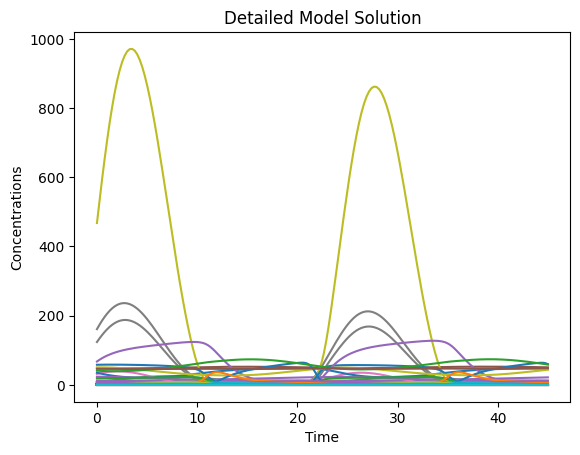

In [ ]:
# Example usage
if __name__ == "__main__":
    # Initial conditions
    initial_conditions = [0.787955, 0.210048, 0.558565, 0.416217, 0.804404, 0.193886, 0.39359, 0.599965, 0.404247, 0.589308,
                          4.18947, 0.579108, 8.34963, 1.41168, 12.3735, 4.47054, 31.869, 161.144, 3.76085, 1.09547,
                          35.1842, 8.56043, 0.520367, 0.25596, 23.7741, 48.0977, 6.5815, 123.95, 467.844, 0.193289,
                          58.2391, 0.0397137, 19.0662, 0.11012, 67.6175, 1.13837, 0.342061, 8.17977, 50.5794, 3.08486,
		                      0.0985802, 1.30846, 41.1658, 0.0156084, 8.72089, 46.5721, 0.0031953, 1.36799, 0.422898, 1.09254,
		                      0.00181722, 5.19698e-05, 0.00512223, 0.106575, 0.000833073, 0.0566636, 0.00329174, 1.4996e-05, 0.00543134, 0.0876909,
		                      0.000333744, 0.0548927, 0.00348546, 1.54312e-05, 0.00510457, 0.0938758, 0.000353611, 0.0535918, 0.914365, 0.664039,
		                      0.0226162, 0.0241531, 0.00356643, 1.94469e-05, 0.000959363, 0.258442, 0.000985386, 0.0249991, 0.000157103, 1.1242e-05,
		                      0.00132337, 0.0105914, 0.00023062, 0.025311, 0.00390694, 1.34882e-05, 0.000809309, 0.124712, 0.000416813, 0.0148919,
                          0.000188833, 1.79979e-06, 0.00109293, 0.00584769, 4.35837e-05, 0.0166107, 0.00428454, 1.47716e-05, 0.00086132, 0.137696,
                          0.000459811, 0.0160349, 0.0002068, 1.94018e-06, 0.0011516, 0.00644626, 4.76349e-05, 0.0177021, 0.00569806, 0.000190832,
                          0.0566834, 0.0287569, 0.000413832, 0.0494651, 0.00414505, 0.000386223, 0.124464, 0.00740796, 0.000654378, 0.104089,
                          0.00666974, 2.54221e-05, 0.00484524, 0.0828541, 0.000294564, 0.0323573, 0.0012142, 1.1508e-05, 0.00976858, 0.0087474,
                          7.98494e-05, 0.0607878, 0.00706385, 2.64292e-05, 0.00442251, 0.0852703, 0.000300906, 0.0301143, 0.00132641, 1.12497e-05,
                          0.00878991, 0.0091505, 7.78605e-05, 0.055586, 0.000792825, 2.57804e-05, 0.00334582, 0.0274125, 0.000385498, 0.0589937,
                          0.000125512, 4.99769e-05, 0.00735186, 0.00550233, 0.000631987, 0.12768, 0.00252101, 1.00779e-05, 0.00248103, 0.0581233,
                          0.000207429, 0.0239137, 0.000305307, 4.90217e-06, 0.00521949, 0.00753943, 6.39585e-05, 0.0471435, 0.00259772, 1.01709e-05,
                          0.00224807, 0.0602479, 0.000213449, 0.0225783, 0.000320067, 4.60372e-06, 0.004701, 0.00797183, 6.35261e-05, 0.0440794]

    # Time span for the simulation
    t_span = np.linspace(0, 45, 180)

    # Parameters
    parameters = [25.9201, 44.854, 23.0747, 39.9409, 46.1038, 102.923, 0.329749, 1.81031, 5.03882, 0.530436,
                  8.90744, 4.64589, 1.25099, 1.3962, 2.93521, 0.0456572, 0.108072, 0.0235285, 0.605268, 0.0454894,
                  7.27215, 6.92686, 0.130196, 6.59924, 0.304176, 0.162392, 6.97166, 0.255032, 0.0120525, 10.9741,
                  6.15445, 2.91009, 0.280863, 0.00886752, 0.00626588, 5.30559, 0.16426, 9.2631, 0.643086, 0.0269078,
                  9.63702, 0.0152514, 0.594609, 5.26501, 0.527453, 2.45584, 0.291429, 0.205813, 0.396392, 0.607387,
                  0.013, 0.644602, 0.0625777, 3.35063, 3.537, 0.17491, 0.481895, 0.369493, 0.766962, 0.58892,
                  0.403425, 0.455544, 0.0188002, 0.0251651, 0.348829, 0.0700322, 1.64876, 0.517303, 0.795402, 1.51019]

    # Solve ODE
    dt_sol = solve_detailed(initial_conditions, t_span, parameters)

    # Plot the solution
    plt.plot(t_span, dt_sol)
    plt.xlabel('Time')
    plt.ylabel('Concentrations')
    '''plt.legend(['GR', 'G', 'GrR', 'Gr', 'GcR', 'Gc', 'GBR', 'GB', 'GBRb', 'GBb',
			'MnPo', 'McPo', 'MnPt', 'McPt', 'MnRt', 'McRt', 'MnRev', 'McRev', 'MnRo', 'McRo',
			'MnB', 'McB', 'MnNp', 'McNp', 'B', 'Cl', 'BC', 'cyrev', 'revn', 'cyrevg',
			'revng', 'cyrevgp', 'revngp', 'cyrevp', 'revnp', 'gto', 'x00001', 'x00011', 'x00100', 'x00110',
			'x00200', 'x00210', 'x01000', 'x01010', 'x01011', 'x02000', 'x02010', 'x02011', 'x10000', 'x10100',
			'x20000', 'x20010', 'x20011', 'x20100', 'x20110', 'x20111', 'x21000', 'x21010', 'x21011', 'x21100',
			'x21110', 'x21111', 'x22000', 'x22010', 'x22011', 'x22100', 'x22110', 'x22111', 'x30000', 'x30100',
			'x30200', 'x30300', 'x40000', 'x40010', 'x40011', 'x40100', 'x40110', 'x40111', 'x40200', 'x40210',
			'x40211', 'x40300', 'x40310', 'x40311', 'x41000', 'x41010', 'x41011', 'x41100', 'x41110', 'x41111',
			'x41200', 'x41210', 'x41211', 'x41300', 'x41310', 'x41311', 'x42000', 'x42010', 'x42011', 'x42100',
			'x42110', 'x42111', 'x42200', 'x42210', 'x42211', 'x42300', 'x42310', 'x42311', 'x50000', 'x50010',
			'x50011', 'x50100', 'x50110', 'x50111', 'x50200', 'x50210', 'x50211', 'x50300', 'x50310', 'x50311',
			'x51000', 'x51010', 'x51011', 'x51100', 'x51110', 'x51111', 'x51200', 'x51210', 'x51211', 'x51300',
			'x51310', 'x51311', 'x52000', 'x52010', 'x52011', 'x52100', 'x52110', 'x52111', 'x52200', 'x52210',
			'x52211', 'x52300', 'x52310', 'x52311', 'x60000', 'x60010', 'x60011', 'x60100', 'x60110', 'x60111',
			'x60200', 'x60210', 'x60211', 'x60300', 'x60310', 'x60311', 'x61000', 'x61010', 'x61011', 'x61100',
			'x61110', 'x61111', 'x61200', 'x61210', 'x61211', 'x61300', 'x61310', 'x61311', 'x62000', 'x62010',
			'x62011', 'x62100', 'x62110', 'x62111', 'x62200', 'x62210', 'x62211', 'x62300', 'x62310', 'x62311'])'''
    plt.title('Detailed Model Solution')
    plt.show()

    # Print the solution
    #print("Solution: \n", sol)


In [ ]:
parameter_index = dict(zip(["trPo", "trPt", "trRo", "trRt", "trB", "trRev", "trNp", "tlp", "tlr", "tlb",
"tlrev", "tlc", "tlnp", "agp", "dg", "ac", "dc", "ar", "dr", "cbin",
"uncbin", "bbin", "unbbin", "cbbin", "uncbbin", "ag", "bin", "unbin", "binrev", "unbinrev",
"binr", "unbinr", "binc", "unbinc", "binrevb", "unbinrevb", "tmc", "tmcrev", "nl", "ne",
"nlrev", "nerev", "lne", "nlbc", "hoo", "hto", "phos", "lono", "lont", "lta",
"ltb", "trgto", "ugto", "Nf", "up", "uro", "urt", "umNp", "umPo", "umPt",
"umRo", "umRt", "ub", "uc", "ubc", "upu", "urev", "uprev", "umB", "umRev"], range(70)))

In [ ]:
variables_dict = dict(zip(['GR', 'G', 'GrR', 'Gr', 'GcR', 'Gc', 'GBR', 'GB', 'GBRb', 'GBb',
			'MnPo', 'McPo', 'MnPt', 'McPt', 'MnRt', 'McRt', 'MnRev', 'McRev', 'MnRo', 'McRo',
			'MnB', 'McB', 'MnNp', 'McNp', 'B', 'Cl', 'BC', 'cyrev', 'revn', 'cyrevg',
			'revng', 'cyrevgp', 'revngp', 'cyrevp', 'revnp', 'gto', 'x00001', 'x00011', 'x00100', 'x00110',
			'x00200', 'x00210', 'x01000', 'x01010', 'x01011', 'x02000', 'x02010', 'x02011', 'x10000', 'x10100',
			'x20000', 'x20010', 'x20011', 'x20100', 'x20110', 'x20111', 'x21000', 'x21010', 'x21011', 'x21100',
			'x21110', 'x21111', 'x22000', 'x22010', 'x22011', 'x22100', 'x22110', 'x22111', 'x30000', 'x30100',
			'x30200', 'x30300', 'x40000', 'x40010', 'x40011', 'x40100', 'x40110', 'x40111', 'x40200', 'x40210',
			'x40211', 'x40300', 'x40310', 'x40311', 'x41000', 'x41010', 'x41011', 'x41100', 'x41110', 'x41111',
			'x41200', 'x41210', 'x41211', 'x41300', 'x41310', 'x41311', 'x42000', 'x42010', 'x42011', 'x42100',
			'x42110', 'x42111', 'x42200', 'x42210', 'x42211', 'x42300', 'x42310', 'x42311', 'x50000', 'x50010',
			'x50011', 'x50100', 'x50110', 'x50111', 'x50200', 'x50210', 'x50211', 'x50300', 'x50310', 'x50311',
			'x51000', 'x51010', 'x51011', 'x51100', 'x51110', 'x51111', 'x51200', 'x51210', 'x51211', 'x51300',
			'x51310', 'x51311', 'x52000', 'x52010', 'x52011', 'x52100', 'x52110', 'x52111', 'x52200', 'x52210',
			'x52211', 'x52300', 'x52310', 'x52311', 'x60000', 'x60010', 'x60011', 'x60100', 'x60110', 'x60111',
			'x60200', 'x60210', 'x60211', 'x60300', 'x60310', 'x60311', 'x61000', 'x61010', 'x61011', 'x61100',
			'x61110', 'x61111', 'x61200', 'x61210', 'x61211', 'x61300', 'x61310', 'x61311', 'x62000', 'x62010',
			'x62011', 'x62100', 'x62110', 'x62111', 'x62200', 'x62210', 'x62211', 'x62300', 'x62310', 'x62311'], list(range(0,181))))

In [ ]:
PER1_protein_list = []
for i in ['x10000', 'x10100', 'x20000', 'x20010', 'x20011', 'x20100', 'x20110', 'x20111', 'x21000', 'x21010', 'x21011', 'x21100',
					'x21110', 'x21111', 'x22000', 'x22010', 'x22011', 'x22100', 'x22110', 'x22111']:
    PER1_protein_list.append(variables_dict[i])

PER2_protein_list = []
for i in ['x30000', 'x30100','x30200', 'x30300', 'x40000', 'x40010', 'x40011', 'x40100', 'x40110', 'x40111', 'x40200', 'x40210',
					'x40211', 'x40300', 'x40310', 'x40311', 'x41000', 'x41010', 'x41011', 'x41100', 'x41110', 'x41111','x41200', 'x41210', 'x41211', 'x41300', 'x41310', 'x41311', 'x42000',
					'x42010', 'x42011', 'x42100', 'x42110', 'x42111', 'x42200', 'x42210', 'x42211', 'x42300', 'x42310', 'x42311', 'x50000', 'x50010','x50011', 'x50100', 'x50110', 'x50111',
					'x50200', 'x50210', 'x50211', 'x50300', 'x50310', 'x50311', 'x51000', 'x51010', 'x51011', 'x51100', 'x51110', 'x51111', 'x51200', 'x51210', 'x51211', 'x51300','x51310',
					'x51311', 'x52000', 'x52010', 'x52011', 'x52100', 'x52110', 'x52111', 'x52200', 'x52210', 'x52211', 'x52300', 'x52310', 'x52311', 'x60000', 'x60010', 'x60011', 'x60100',
					'x60110', 'x60111', 'x60200', 'x60210', 'x60211', 'x60300', 'x60310', 'x60311', 'x61000', 'x61010', 'x61011', 'x61100', 'x61110', 'x61111', 'x61200', 'x61210', 'x61211',
					'x61300', 'x61310', 'x61311', 'x62000', 'x62010','x62011', 'x62100', 'x62110', 'x62111', 'x62200', 'x62210', 'x62211', 'x62300', 'x62310', 'x62311']:
    PER2_protein_list.append(variables_dict[i])

CRY1_protein_list = []
for i in ['x01000', 'x01010', 'x01011','x21000', 'x21010', 'x21011', 'x21100', 'x21110', 'x21111', 'x41000', 'x41010', 'x41011', 'x41100', 'x41110', 'x41111',
					'x41200', 'x41210', 'x41211', 'x41300', 'x41310', 'x41311','x51000', 'x51010', 'x51011', 'x51100', 'x51110', 'x51111', 'x51200', 'x51210', 'x51211', 'x51300',
					'x51310', 'x51311','x61000', 'x61010', 'x61011', 'x61100','x61110', 'x61111', 'x61200', 'x61210', 'x61211', 'x61300', 'x61310', 'x61311']:
    CRY1_protein_list.append(variables_dict[i])

CRY2_protein_list = []
for i in ['x02000', 'x02010', 'x02011', 'x22000', 'x22010', 'x22011', 'x22100', 'x22110', 'x22111', 'x42000', 'x42010', 'x42011', 'x42100', 'x42110',
					'x42111', 'x42200', 'x42210', 'x42211', 'x42300', 'x42310', 'x42311', 'x52000', 'x52010', 'x52011', 'x52100', 'x52110', 'x52111', 'x52200', 'x52210', 'x52211',
					'x52300', 'x52310', 'x52311', 'x62000', 'x62010', 'x62011', 'x62100', 'x62110', 'x62111', 'x62200', 'x62210', 'x62211', 'x62300', 'x62310', 'x62311']:
		CRY2_protein_list.append(variables_dict[i])

### SNF model

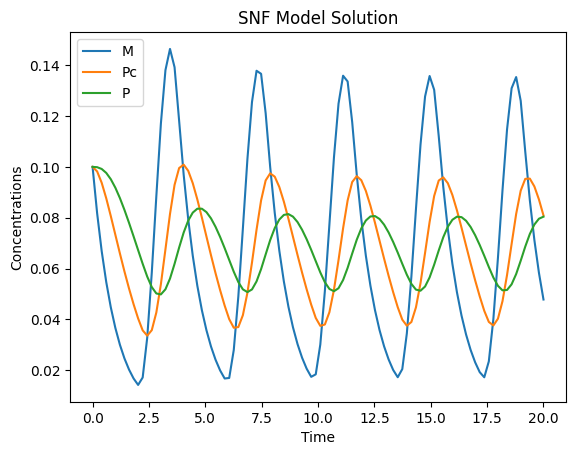

Solution: 
 [[0.1        0.1        0.1       ]
 [0.0817615  0.0982197  0.09988217]
 [0.0668598  0.09375457 0.09918789]
 [0.05468584 0.08764655 0.09763517]
 [0.04474251 0.08064666 0.09515527]
 [0.03662443 0.07328646 0.09180779]
 [0.03000179 0.06593351 0.08772243]
 [0.02460809 0.05883396 0.08306031]
 [0.02023312 0.05214552 0.07798934]
 [0.01673119 0.04596434 0.07266934]
 [0.0141808  0.0403565  0.06724493]
 [0.01709612 0.03566451 0.06185983]
 [0.03281309 0.03357024 0.05681496]
 [0.05836763 0.0357349  0.05269533]
 [0.08849363 0.04269877 0.05017971]
 [0.11709486 0.05385088 0.04981174]
 [0.13808524 0.06756295 0.05182449]
 [0.14643408 0.08147454 0.05603581]
 [0.13922976 0.0929212  0.06182892]
 [0.1182262  0.09953376 0.06822779]
 [0.09696217 0.10088441 0.07415145]
 [0.0793966  0.09845362 0.0788581 ]
 [0.06499751 0.09356262 0.08200929]
 [0.05321523 0.08718752 0.0835365 ]
 [0.04358376 0.08003311 0.08353554]
 [0.03571842 0.07259785 0.08219322]
 [0.02930568 0.06522552 0.07973806]
 [0.02409536 0.0

In [ ]:
def SNF_model(statevector, t, parameters):
    """
    Defines the differential equations for the simple SNF model.

    Arguments:
        statevector : list or array
            The state vector [M, Pc, P].
        t : float
            The current time point.
        parameters : list or array
            The parameter values [ao, at, ah, bo, bt, bh, A, Kd].

    Returns:
        derivs : list
            The derivatives [dM/dt, dPc/dt, dP/dt].
    """

    M, Pc, P = statevector
    ao, at, ah, bo, bt, bh, A, Kd = parameters

    # Differential equations
    M_dot = ao * (A - P - Kd + np.sqrt((A - P - Kd)**2 + 4 * A * Kd)) / (2 * A) - bo * M
    Pc_dot = at * M - bt * Pc
    P_dot = ah * Pc - bh * P

    return [M_dot, Pc_dot, P_dot]

def solve_SNF(initial_conditions, t_span, parameters):
    """
    Solves the SNF model ODEs using odeint.

    Arguments:
        initial_conditions : list or array
            The initial conditions [M0, Pc0, P0].
        t_span : array
            The time points for which to solve the ODEs.
        parameters : list or array
            The parameter values [ao, at, ah, bo, bt, bh, A, Kd].

    Returns:
        sol : array
            The solution of the ODEs at each time point in t_span.
    """

    # Solve ODE
    sol = odeint(SNF_model, initial_conditions, t_span, args=(parameters,))
    return sol

# Example usage

if __name__ == "__main__":
    # Initial conditions
    simple_initial_conditions = [0.1, 0.1, 0.1]

    # Time span for the simulation
    simple_t_span = np.linspace(0, 20, 100)

    # Parameters
    simple_parameters = [1, 1, 1, 1, 1, 1, 0.0659, 1e-05]

    # Solve ODE
    snf_sol = solve_SNF(simple_initial_conditions, simple_t_span, simple_parameters)

    # Plot the solution
    plt.plot(simple_t_span, snf_sol)
    plt.xlabel('Time')
    plt.ylabel('Concentrations')
    plt.legend(['M', 'Pc', 'P'])
    plt.title('SNF Model Solution')
    plt.show()

    # Print the solution
    print("Solution: \n", snf_sol)


### PNF model

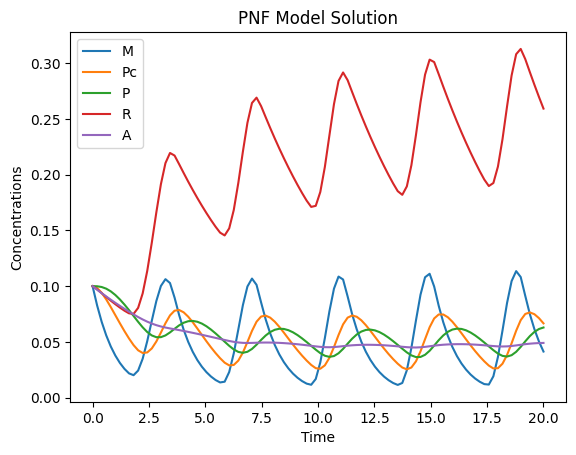

Solution: 
 [[0.1        0.1        0.1        0.1        0.1       ]
 [0.0826665  0.09832787 0.09989012 0.09709505 0.09681155]
 [0.06794939 0.09403004 0.09922999 0.09369099 0.09372396]
 [0.05580196 0.08807467 0.09773476 0.09028709 0.0907319 ]
 [0.04583955 0.08119912 0.09532715 0.08697723 0.08783205]
 [0.03769983 0.0739363  0.09205886 0.08379836 0.08502163]
 [0.03108283 0.06666106 0.08805401 0.08078139 0.08229826]
 [0.02576952 0.059632   0.08347096 0.07798356 0.07965993]
 [0.02172483 0.0530341  0.0784787  0.07561206 0.07710562]
 [0.02009436 0.04709073 0.07324937 0.07510522 0.07463925]
 [0.02423225 0.04244054 0.06799764 0.08048812 0.07228738]
 [0.03487335 0.04002427 0.06305393 0.09350886 0.07010065]
 [0.05059734 0.04050756 0.05883994 0.11363544 0.06813114]
 [0.06892828 0.04406965 0.05577772 0.13893159 0.06641906]
 [0.08662987 0.05032705 0.05419231 0.16622208 0.06498289]
 [0.1001522  0.0583363  0.05422546 0.19147066 0.06381176]
 [0.10626704 0.06669696 0.0557748  0.21043616 0.06286241]
 [

In [ ]:
def PNF_model(statevector, t, parameters):
    """
    Defines the differential equations for the simple PNF model.

    Arguments:
        statevector : list or array
            The state vector [M, Pc, P, R, A].
        t : float
            The current time point.
        parameters : list or array
            The parameter values [ao, at, ah, bo, bt, bh, ro, rt, do, dt, Kd].

    Returns:
        derivs : list
            The derivatives [dM/dt, dPc/dt, dP/dt, dR/dt, dA/dt].
    """

    M, Pc, P, R, A = statevector
    ao, at, ah, bo, bt, bh, ro, rt, do, dt, Kd = parameters

    # Differential equations
    M_dot = ao * (A - P - Kd + np.sqrt((A - P - Kd)**2 + 4 * A * Kd)) / (2 * A) - bo * M
    Pc_dot = at * M - bt * Pc
    P_dot = ah * Pc - bh * P
    R_dot = ro * (A - P - Kd + np.sqrt((A - P - Kd)**2 + 4 * A * Kd)) / (2 * A) - do * R
    A_dot = rt * R - dt * A

    return [M_dot, Pc_dot, P_dot, R_dot, A_dot]

def solve_PNF(initial_conditions, t_span, parameters):
    """
    Solves the PNF model ODEs using odeint.

    Arguments:
        initial_conditions : list or array
            The initial conditions [M0, Pc0, P0, R0, A0].
        t_span : array
            The time points for which to solve the ODEs.
        parameters : list or array
            The parameter values [ao, at, ah, bo, bt, bh, ro, rt, do, dt, Kd].

    Returns:
        sol : array
            The solution of the ODEs at each time point in t_span.
    """

    # Solve ODE
    sol = odeint(PNF_model, initial_conditions, t_span, args=(parameters,))
    return sol

# Example usage
if __name__ == "__main__":
    # Initial conditions
    addi_initial_conditions = [0.1, 0.1, 0.1, 0.1, 0.1]

    # Time span for the simulation
    addi_t_span = np.linspace(0, 20, 100)

    # Parameters
    parameters = [1, 1, 1, 1, 1, 1, 1, 0.0395, 0.2, 0.2, 1e-05]

    # Solve ODE
    pnf_sol = solve_PNF(addi_initial_conditions, addi_t_span, parameters)

    # Plot the solution
    plt.plot(addi_t_span, pnf_sol)
    plt.xlabel('Time')
    plt.ylabel('Concentrations')
    plt.legend(['M', 'Pc', 'P', 'R', 'A'])
    plt.title('PNF Model Solution')
    plt.show()

    # Print the solution
    print("Solution: \n", pnf_sol)


### NNF model

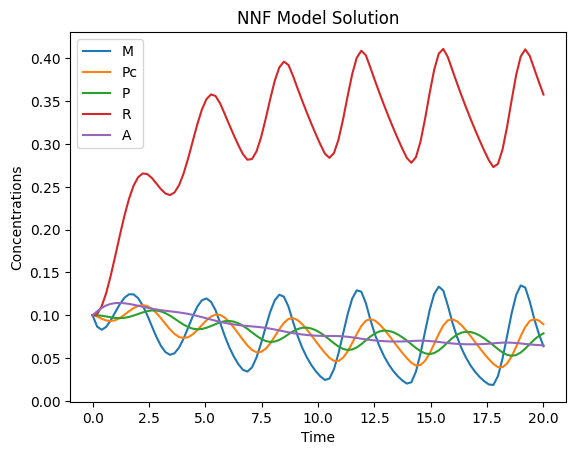

Solution: 
 [[0.1        0.1        0.1        0.1        0.1       ]
 [0.08674287 0.09859067 0.099903   0.10139017 0.10454773]
 [0.08305952 0.09594611 0.09941581 0.11046076 0.1084949 ]
 [0.08645592 0.0938237  0.09856326 0.12612426 0.11143246]
 [0.09418606 0.09316066 0.09760762 0.14655403 0.11328749]
 [0.10377731 0.09424388 0.09687032 0.16974519 0.11419679]
 [0.11311066 0.09688848 0.09661928 0.19366409 0.11436435]
 [0.12044713 0.1005912  0.0970074  0.21634796 0.11398763]
 [0.12447664 0.1046623  0.098048   0.2360297  0.11323388]
 [0.12439101 0.10834485 0.0996177  0.25129365 0.11223852]
 [0.11995598 0.11092582 0.10147976 0.26123912 0.11111021]
 [0.11155446 0.11183782 0.10332261 0.26562072 0.10993659]
 [0.10017978 0.11074552 0.10480869 0.26493822 0.10878801]
 [0.08735842 0.10760904 0.10562802 0.26044562 0.10771832]
 [0.0748925  0.10270757 0.10555031 0.25395273 0.10676233]
 [0.06432951 0.09658238 0.1044649  0.24728617 0.10593301]
 [0.05690051 0.08992308 0.10239581 0.24215992 0.10522041]
 [

In [ ]:
def NNF_model(statevector, t, parameters):
    """
    Defines the differential equations for the simple NNF model.

    Arguments:
        statevector : list or array
            The state vector [M, Pc, P, R, A].
        t : float
            The current time point.
        parameters : list or array
            The parameter values [ao, at, ah, bo, bt, bh, ro, rt, do, dt, Kd].

    Returns:
        derivs : list
            The derivatives [dM/dt, dPc/dt, dP/dt, dR/dt, dA/dt].
    """

    M, Pc, P, R, A = statevector
    ao, at, ah, bo, bt, bh, ro, rt, do, dt, Kd = parameters

    # Differential equations
    M_dot = ao * (A - P - Kd + np.sqrt((A - P - Kd)**2 + 4 * A * Kd)) / (2 * A) - bo * M
    Pc_dot = at * M - bt * Pc
    P_dot = ah * Pc - bh * P
    R_dot = ro * (A - P - Kd + np.sqrt((A - P - Kd)**2 + 4 * A * Kd)) / (2 * A) - do * R
    A_dot = rt / R - dt * A

    return [M_dot, Pc_dot, P_dot, R_dot, A_dot]

def solve_NNF(initial_conditions, t_span, parameters):
    """
    Solves the NNF model ODEs using odeint.

    Arguments:
        initial_conditions : list or array
            The initial conditions [M0, Pc0, P0, R0, A0].
        t_span : array
            The time points for which to solve the ODEs.
        parameters : list or array
            The parameter values [ao, at, ah, bo, bt, bh, ro, rt, do, dt, Kd].

    Returns:
        sol : array
            The solution of the ODEs at each time point in t_span.
    """

    # Solve ODE
    sol = odeint(NNF_model, initial_conditions, t_span, args=(parameters,))
    return sol

# Example usage
if __name__ == "__main__":
    # Initial conditions
    addi_initial_conditions = [0.1, 0.1, 0.1, 0.1, 0.1]

    # Time span for the simulation
    addi_t_span = np.linspace(0, 20, 100)

    # Parameters
    parameters = [1, 1, 1, 1, 1, 1, 1, 0.0043, 0.2, 0.2, 1e-05]

    # Solve ODE
    nnf_sol = solve_NNF(addi_initial_conditions, addi_t_span, parameters)

    # Plot the solution
    plt.plot(addi_t_span, nnf_sol)
    plt.xlabel('Time')
    plt.ylabel('Concentrations')
    plt.legend(['M', 'Pc', 'P', 'R', 'A'])
    plt.title('NNF Model Solution')
    plt.show()

    # Print the solution
    print("Solution: \n", nnf_sol)


## Simulated Annealing

### 1st Round SA:

In [ ]:
def protein_relative_abundance(sol,lst):
    # Calculate total concentration for each element in the list
    concentration = 0
    for i in lst:
        concentration += sol.T[i]

    # Find the maximum and minimum concentration
    max_concentration = concentration.max()
    min_concentration = concentration.min()

    # Normalize the concentrations
    normalized_concentration = (concentration - min_concentration) / (max_concentration - min_concentration)

    return normalized_concentration

def relative_abundance(sol,indices):
    concentration = np.sum(sol[:, indices], axis=1)
    max_concentration = np.max(concentration)
    return concentration / max_concentration

In [ ]:
def objective_function(params, initial_conditions, t_span, target_data):
    # Solve the ODE with the given parameters
    sol = solve_detailed(initial_conditions, t_span, params)

    if np.any(np.isnan(sol)) or np.any(np.isinf(sol)):
        return 1000

    # Calculate relative abundances for mRNA
    Per1_mRNA = relative_abundance(sol,[10, 11])  # MnPo/McPo
    Per2_mRNA = relative_abundance(sol,[12, 13])  # MnPt/McPt
    Cry1_mRNA = relative_abundance(sol,[18, 19])  # MnRo/McRo
    Bmals_mRNA = relative_abundance(sol,[20, 21]) # MnB/McB
    Npas2_mRNA = relative_abundance(sol,[22, 23]) # MnNp/McNp
    Rev_erbs_mRNA = relative_abundance(sol,[16, 17]) # MnRev/McRev

    # Calculate relative abundances for proteins
    PER1_protein = protein_relative_abundance(sol,PER1_protein_list)
    PER2_protein = protein_relative_abundance(sol,PER2_protein_list)
    CRY1_protein = protein_relative_abundance(sol,CRY1_protein_list)
    CRY2_protein = protein_relative_abundance(sol,CRY2_protein_list)

    # Interpolate simulated data to match target data time points
    mRNA_targets = {
        'Per1': (Per1_mRNA, 'x'),
        'Per2': (Per2_mRNA, 'x.2'),
        'Cry1': (Cry1_mRNA, 'x.3'),
        'Bmals': (Bmals_mRNA, 'x.1'),
        'Npas2': (Npas2_mRNA, 'x.4'),
        'Rev-erbs': (Rev_erbs_mRNA, 'x.5')
    }
    protein_targets = {
        'PER1': (PER1_protein, 'x'),
        'PER2': (PER2_protein, 'x.1'),
        'CRY1': (CRY1_protein, 'x.2'),
        'CRY2': (CRY2_protein, 'x.3')
    }

    # mRNA weights and error calculation
    total_mRNA_error = 0
    for key, (sim_data, time_key) in mRNA_targets.items():
        sim_interpolated = np.interp(target_data[time_key], t_span, sim_data)
        experimental_data = target_data[key] * 10
        if len(sim_interpolated) != len(experimental_data):
            raise ValueError(f"Shape mismatch for {key}: sim_interpolated {len(sim_interpolated)}, experimental_data {len(experimental_data)}")
        w = np.where(experimental_data == 1, 5, 1)  # Apply weights
        nj = len(experimental_data)
        total_mRNA_error += np.sum(w * ((sim_interpolated - experimental_data) ** 2)) / nj

    # Protein weights and error calculation
    total_protein_error = 0
    for key, (sim_data, time_key) in protein_targets.items():
        sim_interpolated = np.interp(protein[time_key], t_span, sim_data)
        experimental_data = protein[key] * 10
        if len(sim_interpolated) != len(experimental_data):
            raise ValueError(f"Shape mismatch for {key}: sim_interpolated {len(sim_interpolated)}, experimental_data {len(experimental_data)}")
        w = np.where(experimental_data == 1, 5, 1)  # Apply weights
        total_protein_error += np.sum(w * ((sim_interpolated - experimental_data) ** 2)) / len(experimental_data)

    total_error = np.sqrt(total_mRNA_error + total_protein_error)

    return total_error


In [ ]:
def solve_detailed(initial_conditions, t_span, parameters):
    # Placeholder for the actual ODE solver
    # Replace this with the appropriate model solution
    sol = odeint(detailed_model, initial_conditions, t_span, args=(parameters,))
    return sol

In [ ]:
def apply_constraints(params):
    # (1) Allow 14 specific parameters to vary within 50% of their given values
    constrained_params = params.copy()
    constrained_params[:14] = np.clip(constrained_params[:14], 0.5 * params[:14], 1.5 * params[:14])

    # (2) PER1’s phosphorylation rate < PER2’s
    if constrained_params[parameter_index['hoo']] >= constrained_params[parameter_index['hto']]:
        constrained_params[parameter_index['hoo']] = 0.9 * constrained_params[parameter_index['hto']]

    # (3) Dissociation constant BMALs–CLOCK and CRY > BMALs–CLOCK and PER
    if constrained_params[parameter_index['uncbbin']] <= constrained_params[parameter_index['unbbin']]:
        constrained_params[parameter_index['uncbbin']] = 1.1 * constrained_params[parameter_index['unbbin']]

    # (4) Volume ratio 1 <= cytoplasm/nucleus <= 3.5
    constrained_params[parameter_index['Nf']] = np.clip(constrained_params[parameter_index['Nf']], 1, 3.5)

    return constrained_params

In [ ]:
def simulated_annealing(initial_conditions, t_span, parameters, target_data, max_iter=1000, initial_temp=100, cooling_rate=0.99):
    current_params = np.array(parameters)
    best_params = current_params.copy()
    best_error = objective_function(best_params, initial_conditions, t_span, target_data)

    current_temp = initial_temp
    errors = []
    for i in range(max_iter):
        # Generate new parameters by perturbing current parameters
        new_params = current_params + np.random.uniform(-1, 1, size=current_params.shape)
        new_params = apply_constraints(new_params)

        # Calculate the new error
        new_error = objective_function(new_params, initial_conditions, t_span, target_data)

        # Decide whether to accept the new parameters
        if new_error < best_error or random.random() < np.exp((best_error - new_error) / current_temp):
            current_params = new_params
            if new_error < best_error:
                best_params = new_params
                best_error = new_error
                # Record and plot the current error
        # Record the current error
        errors.append(new_error)

        # Print the current error
        print(f"Iteration {i + 1}/{max_iter}, Error: {new_error:.4f}")

        # Cool down the temperature
        current_temp *= cooling_rate

    return best_params, best_error


In [ ]:
if __name__ == "__main__":
    # Initial conditions
    initial_conditions = [0.787955, 0.210048, 0.558565, 0.416217, 0.804404, 0.193886, 0.39359, 0.599965, 0.404247, 0.589308,
                          4.18947, 0.579108, 8.34963, 1.41168, 12.3735, 4.47054, 31.869, 161.144, 3.76085, 1.09547,
                          35.1842, 8.56043, 0.520367, 0.25596, 23.7741, 48.0977, 6.5815, 123.95, 467.844, 0.193289,
                          58.2391, 0.0397137, 19.0662, 0.11012, 67.6175, 1.13837, 0.342061, 8.17977, 50.5794, 3.08486,
                          0.0985802, 1.30846, 41.1658, 0.0156084, 8.72089, 46.5721, 0.0031953, 1.36799, 0.422898, 1.09254,
                          0.00181722, 5.19698e-05, 0.00512223, 0.106575, 0.000833073, 0.0566636, 0.00329174, 1.4996e-05, 0.00543134, 0.0876909,
                          0.000333744, 0.0548927, 0.00348546, 1.54312e-05, 0.00510457, 0.0938758, 0.000353611, 0.0535918, 0.914365, 0.664039,
                          0.0226162, 0.0241531, 0.00356643, 1.94469e-05, 0.000959363, 0.258442, 0.000985386, 0.0249991, 0.000157103, 1.1242e-05,
                          0.00132337, 0.0105914, 0.00023062, 0.025311, 0.00390694, 1.34882e-05, 0.000809309, 0.124712, 0.000416813, 0.0148919,
                          0.000188833, 1.79979e-06, 0.00109293, 0.00584769, 4.35837e-05, 0.0166107, 0.00428454, 1.47716e-05, 0.00086132, 0.137696,
                          0.000459811, 0.0160349, 0.0002068, 1.94018e-06, 0.0011516, 0.00644626, 4.76349e-05, 0.0177021, 0.00569806, 0.000190832,
                          0.0566834, 0.0287569, 0.000413832, 0.0494651, 0.00414505, 0.000386223, 0.124464, 0.00740796, 0.000654378, 0.104089,
                          0.00666974, 2.54221e-05, 0.00484524, 0.0828541, 0.000294564, 0.0323573, 0.0012142, 1.1508e-05, 0.00976858, 0.0087474,
                          7.98494e-05, 0.0607878, 0.00706385, 2.64292e-05, 0.00442251, 0.0852703, 0.000300906, 0.0301143, 0.00132641, 1.12497e-05,
                          0.00878991, 0.0091505, 7.78605e-05, 0.055586, 0.000792825, 2.57804e-05, 0.00334582, 0.0274125, 0.000385498, 0.0589937,
                          0.000125512, 4.99769e-05, 0.00735186, 0.00550233, 0.000631987, 0.12768, 0.00252101, 1.00779e-05, 0.00248103, 0.0581233,
                          0.000207429, 0.0239137, 0.000305307, 4.90217e-06, 0.00521949, 0.00753943, 6.39585e-05, 0.0471435, 0.00259772, 1.01709e-05,
                          0.00224807, 0.0602479, 0.000213449, 0.0225783, 0.000320067, 4.60372e-06, 0.004701, 0.00797183, 6.35261e-05, 0.0440794]

    # Time span for the simulation
    t_span = np.linspace(0, 45, 180)

    # Parameters
    trPo, trPt, trRo, trRt, trB, trRev,trNp = np.random.uniform(1, 105, 7)
    tlp, tlr, tlb, tlrev, tlc, tlnp = np.random.uniform(0, 10, 6)
    agp, dg, ac, dc, ar, dr = np.random.uniform(0, 3, 6)
    cbin, uncbin = np.random.uniform(0, 3), np.random.uniform(5, 10)
    bbin, unbbin, cbbin, uncbbin = 6.92686, 0.130196, 6.59924, 0.304176
    ag = np.random.uniform(0, 1)
    bin, unbin, binrev, unbinrev, binr, unbinr, binc, unbinc, binrevb, unbinrevb = np.random.uniform(0,7,10)
    tmc, tmcrev = np.random.uniform(0, 10, 2)
    nl, ne, nlrev, nerev = np.random.uniform(0, 10, 4)
    lne = np.random.uniform(0, 1)
    nlbc = np.random.uniform(0, 10)
    hoo, hto = 0.527453, 2.45584
    phos = np.random.uniform(0, 1)
    lono, lont = 0.205813, 0.396392
    lta, ltb = 0.607387, 0.013
    trgto, ugto = np.random.uniform(0, 1, 2)
    Nf = 3.35063
    up = 3.537
    uro = 0.17491
    urt = 0.481895
    umNp= np.random.uniform(0, 1)
    umPo, umPt, umRo, umRt = 0.766962, 0.58892, 0.403425, 0.455544
    ub, uc, ubc, upu, urev, uprev = 0.0188002, 0.0251651, 0.348829, 0.0700322, 1.64876,0.517303
    umB, umRev = 0.795402, 1.51019
    parameters= [trPo, trPt, trRo, trRt, trB, trRev, trNp, tlp, tlr, tlb,
                  tlrev, tlc, tlnp, agp, dg, ac, dc, ar, dr, cbin,
                  uncbin, bbin, unbbin, cbbin, uncbbin, ag, bin, unbin, binrev, unbinrev,
                  binr, unbinr, binc, unbinc, binrevb, unbinrevb, tmc, tmcrev, nl, ne,
                  nlrev, nerev, lne, nlbc, hoo, hto, phos, lono, lont, lta,
                  ltb, trgto, ugto, Nf, up, uro, urt, umNp, umPo, umPt,
                  umRo, umRt, ub, uc, ubc, upu, urev, uprev, umB, umRev]

    # Target data (experimental data)
    target_data = mRNA # your target data here

    # Run simulated annealing
    best_params, best_error = simulated_annealing(initial_conditions, t_span, parameters, target_data)

    print("Best Parameters:", best_params)
    print("Best Error:", best_error)

Iteration 1/1000, Error: 18.4776


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Iteration 2/1000, Error: 19.4237
Iteration 3/1000, Error: 18.7718
Iteration 4/1000, Error: 19.0566
Iteration 5/1000, Error: 19.6452
Iteration 6/1000, Error: 19.0565
Iteration 7/1000, Error: 19.0565
Iteration 8/1000, Error: 19.0566
Iteration 9/1000, Error: 19.0565
Iteration 10/1000, Error: 19.0565
Iteration 11/1000, Error: 19.0565
Iteration 12/1000, Error: 19.0565
Iteration 13/1000, Error: 19.0565
Iteration 14/1000, Error: 19.0565
Iteration 15/1000, Error: 19.0565
Iteration 16/1000, Error: 19.0565
Iteration 17/1000, Error: 19.0566
Iteration 18/1000, Error: 19.0566
Iteration 19/1000, Error: 19.0568
Iteration 20/1000, Error: 19.0570
Iteration 21/1000, Error: 19.0566
Iteration 22/1000, Error: 19.0567
Iteration 23/1000, Error: 19.5722
Iteration 24/1000, Error: 19.0566
Iteration 25/1000, Error: 19.0566
Iteration 26/1000, Error: 19.0565
Iteration 27/1000, Error: 19.0565
Iteration 28/1000, Error: 19.0565
Iteration 29/1000, Error: 19.0565
Iteration 30/1000, Error: 19.0565
Iteration 31/1000, Err

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Iteration 274/1000, Error: 19.0606
Iteration 275/1000, Error: 19.0610
Iteration 276/1000, Error: 19.0648
Iteration 277/1000, Error: 19.0728
Iteration 278/1000, Error: 19.0763
Iteration 279/1000, Error: 19.0747
Iteration 280/1000, Error: 19.0917
Iteration 281/1000, Error: 11664266288398245889572864.0000
Iteration 282/1000, Error: 19.0749
Iteration 283/1000, Error: 19.1336
Iteration 284/1000, Error: 19.1778
Iteration 285/1000, Error: 19.1394
Iteration 286/1000, Error: 19.2278
Iteration 287/1000, Error: 19.2362
Iteration 288/1000, Error: 19.3838
Iteration 289/1000, Error: 19.6571
Iteration 290/1000, Error: 20.4179
Iteration 291/1000, Error: 19.7365
Iteration 292/1000, Error: 19.8466
Iteration 293/1000, Error: 20.3127
Iteration 294/1000, Error: 26.2835
Iteration 295/1000, Error: 21.7332
Iteration 296/1000, Error: 20.3068
Iteration 297/1000, Error: 28.2768
Iteration 298/1000, Error: 24.0174
Iteration 299/1000, Error: 26.3577
Iteration 300/1000, Error: 24.5724
Iteration 301/1000, Error: 27.4

Best Parameters: [2.47083876e+00 7.43127397e+01 7.15187110e+01 3.21786147e+01
 4.35074565e+01 5.83047107e+01 5.41317364e+01 4.12819597e+00
 8.84820028e+00 2.50716886e+00 2.37837848e+00 3.56116822e+00
 2.77039398e+00 1.87194500e+00 2.21686043e+00 5.73666533e-01
 2.48722209e+00 2.03279996e+00 2.69559982e+00 2.44332926e-01
 5.57979043e+00 6.92686000e+00 1.30196000e-01 6.59924000e+00
 3.04176000e-01 6.94879433e-01 5.32968268e+00 5.21168911e+00
 7.52135408e-01 4.45710713e+00 4.33116961e+00 3.68144682e+00
 4.50531533e+00 2.43945642e+00 3.97483224e+00 2.93696509e+00
 2.95720620e+00 7.60074932e+00 2.96224913e+00 3.57680581e+00
 9.46660273e-01 7.89682965e+00 8.57621681e-01 7.29501095e+00
 5.27453000e-01 2.45584000e+00 9.90759368e-01 2.05813000e-01
 3.96392000e-01 6.07387000e-01 1.30000000e-02 8.15068998e-01
 9.11035419e-01 3.35063000e+00 3.53700000e+00 1.74910000e-01
 4.81895000e-01 1.81912696e-01 7.66962000e-01 5.88920000e-01
 4.03425000e-01 4.55544000e-01 1.88002000e-02 2.51651000e-02
 3.48829000e-01 7.00322000e-02 1.64876000e+00 5.17303000e-01
 7.95402000e-01 1.51019000e+00]

### 2nd Round SA

In [ ]:
def sec_objective_function(params, initial_conditions, t_span, target_data, protein_max_values, simulated_periods, measured_periods, arrhythmic_amplitudes):
    # Solve the ODE with the given parameters
    sol = solve_detailed(initial_conditions, t_span, params)

    if np.any(np.isnan(sol)) or np.any(np.isinf(sol)):
        return 1000

    # Calculate relative abundances for mRNA
    Per1_mRNA = relative_abundance(sol,[10, 11])  # MnPo/McPo
    Per2_mRNA = relative_abundance(sol,[12, 13])  # MnPt/McPt
    Cry1_mRNA = relative_abundance(sol,[18, 19])  # MnRo/McRo
    Bmals_mRNA = relative_abundance(sol,[20, 21]) # MnB/McB
    Npas2_mRNA = relative_abundance(sol,[22, 23]) # MnNp/McNp
    Rev_erbs_mRNA = relative_abundance(sol,[16, 17]) # MnRev/McRev

    # Calculate relative abundances for proteins
    PER1_protein = protein_relative_abundance(sol,PER1_protein_list)
    PER2_protein = protein_relative_abundance(sol,PER2_protein_list)
    CRY1_protein = protein_relative_abundance(sol,CRY1_protein_list)
    CRY2_protein = protein_relative_abundance(sol,CRY2_protein_list)

    # Interpolate simulated data to match target data time points
    mRNA_targets = {
        'Per1': (Per1_mRNA, 'x'),
        'Per2': (Per2_mRNA, 'x.2'),
        'Cry1': (Cry1_mRNA, 'x.3'),
        'Bmals': (Bmals_mRNA, 'x.1'),
        'Npas2': (Npas2_mRNA, 'x.4'),
        'Rev-erbs': (Rev_erbs_mRNA, 'x.5')
    }
    protein_targets = {
        'PER1': (PER1_protein, 'x'),
        'PER2': (PER2_protein, 'x.1'),
        'CRY1': (CRY1_protein, 'x.2'),
        'CRY2': (CRY2_protein, 'x.3')
    }

    # mRNA weights and error calculation
    total_mRNA_error = 0
    for key, (sim_data, time_key) in mRNA_targets.items():
        sim_interpolated = np.interp(target_data[time_key], t_span, sim_data)
        experimental_data = target_data[key] * 10
        if len(sim_interpolated) != len(experimental_data):
            raise ValueError(f"Shape mismatch for {key}: sim_interpolated {len(sim_interpolated)}, experimental_data {len(experimental_data)}")
        w = np.where(experimental_data == 1, 5, 1)  # Apply weights
        nj = len(experimental_data)
        total_mRNA_error += np.sum(w * ((sim_interpolated - experimental_data) ** 2)) / nj

    # Protein weights and error calculation
    total_protein_error = 0
    for key, (sim_data, time_key) in protein_targets.items():
        sim_interpolated = np.interp(protein[time_key], t_span, sim_data)
        experimental_data = protein[key] * 10
        if len(sim_interpolated) != len(experimental_data):
            raise ValueError(f"Shape mismatch for {key}: sim_interpolated {len(sim_interpolated)}, experimental_data {len(experimental_data)}")
        w = np.where(experimental_data == 1, 5, 1)  # Apply weights
        total_protein_error += np.sum(w * ((sim_interpolated - experimental_data) ** 2)) / len(experimental_data)

    # Maximum value error calculation
    max_value_error = np.sum((protein_max_values - target_data['protein_max_values']) ** 2)

    # Period error calculation
    period_error = np.sum(((simulated_periods / measured_periods) - 1) ** 2)

    # Arrhythmic amplitude error calculation
    arrhythmic_error = np.sum(arrhythmic_amplitudes ** 2)

    # Total error calculation
    total_error = np.sqrt(total_mRNA_error + total_protein_error + max_value_error + period_error + arrhythmic_error)

    return total_error

In [ ]:
def sec_simulated_annealing(initial_conditions, t_span, parameters, target_data, max_iter=1000, initial_temp=100, cooling_rate=0.99):
    current_params = np.array(parameters)
    best_params = current_params.copy()
    best_error = sec_objective_function(best_params, initial_conditions, t_span, target_data)

    current_temp = initial_temp
    errors = []
    for i in range(max_iter):
        # Generate new parameters by perturbing current parameters
        new_params = current_params + np.random.uniform(-1, 1, size=current_params.shape)
        new_params = apply_constraints(new_params)

        # Calculate the new error
        new_error = objective_function(new_params, initial_conditions, t_span, target_data)

        # Decide whether to accept the new parameters
        if new_error < best_error or random.random() < np.exp((best_error - new_error) / current_temp):
            current_params = new_params
            if new_error < best_error:
                best_params = new_params
                best_error = new_error
                # Record and plot the current error
        # Record the current error
        errors.append(new_error)

        # Print the current error
        print(f"Iteration {i + 1}/{max_iter}, Error: {new_error:.4f}")

        # Cool down the temperature
        current_temp *= cooling_rate

    return best_params, best_error


In [ ]:
if __name__ == "__main__":
    # Initial conditions
    initial_conditions = initial_conditions

    # Time span for the simulation
    t_span = np.linspace(0, 45, 180)

    # Parameters
    parameters= best_params

    # Target data (experimental data)
    target_data = mRNA # your target data here

    # Run simulated annealing
    sec_best_params, sec_best_error = simulated_annealing(initial_conditions, t_span, parameters, target_data)

    print("Best Parameters:", sec_best_params)
    print("Best Error:", sec_best_error)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Iteration 1/1000, Error: 18.4679
Iteration 2/1000, Error: 19.5545
Iteration 3/1000, Error: 18.4715
Iteration 4/1000, Error: 18.4676
Iteration 5/1000, Error: 18.4676
Iteration 6/1000, Error: 18.4686
Iteration 7/1000, Error: 18.4688
Iteration 8/1000, Error: 18.4763
Iteration 9/1000, Error: 18.8095
Iteration 10/1000, Error: 19.2496
Iteration 11/1000, Error: 18.8869
Iteration 12/1000, Error: 19.2445
Iteration 13/1000, Error: 19.1583
Iteration 14/1000, Error: 19.1500
Iteration 15/1000, Error: 18.8871
Iteration 16/1000, Error: 18.9030
Iteration 17/1000, Error: 18.8870
Iteration 18/1000, Error: 18.8867
Iteration 19/1000, Error: 18.8869
Iteration 20/1000, Error: 19.2587
Iteration 21/1000, Error: 18.9194
Iteration 22/1000, Error: 19.1488
Iteration 23/1000, Error: 18.8871
Iteration 24/1000, Error: 18.8872
Iteration 25/1000, Error: 18.8872
Iteration 26/1000, Error: 18.8872
Iteration 27/1000, Error: 18.8873
Iteration 28/1000, Error: 18.8873
Iteration 29/1000, Error: 18.8873
Iteration 30/1000, Erro

best parameter : [ 3.25506231 76.29841289 72.14230883 31.79065561 44.1842038  58.32036485
 55.14432289  4.15760962 10.95621932  1.40229963 -0.86533424  3.29427291
  2.89192076  1.33254275  1.43733734  1.5656568   3.94906085  2.81341198
  1.60219779  0.74839154  5.05408563  4.98370809  1.66409125  6.0157564
  1.83050037 -1.09661783  7.45839333  6.53962896  1.34276483  4.14325946
  3.56942954  2.73389193  4.32614493  4.44704632  1.11530581  1.53696542
  3.17387402  9.31099956  2.12898897  5.16427124  1.23747869  8.15077062
  1.5206703   8.7189189  -0.19523654  4.1916255   1.17258148  0.96411248
  1.34038956 -1.63210078  0.9028314   0.50510421  2.65364112  2.97331249
  2.40775962 -1.2283685  -0.83959167  1.17100528 -1.58482752 -0.50193094
 -0.57582138  2.17789997 -1.20273339  0.48236945  2.30063336  1.64978291
 -0.68983041  3.01751247  1.30048235  1.95729527]

###  Visualization

#### 1st round

In [ ]:
if __name__ == "__main__":
    # Initial conditions
    initial_conditions = initial_conditions

    # Time span for the simulation
    t_span = np.linspace(0, 45, 180)

    # Parameters
    parameters = best_params

    # Solve ODE
    our_sol = solve_detailed(initial_conditions, t_span, parameters)

In [ ]:
our_Per1_mRNA = relative_abundance(our_sol,[10, 11]) #MnPo/McPo
our_Per2_mRNA = relative_abundance(our_sol,[12, 13]) #MnPt/McPt
our_Cry1_mRNA = relative_abundance(our_sol,[18, 19]) #MnRo/McRo
our_Bmals_mRNA = relative_abundance(our_sol,[20, 21]) #MnB/McB
our_Npas2_mRNA = relative_abundance(our_sol,[22, 23]) #MnNp/McNp
our_Rev_erbs_mRNA = relative_abundance(our_sol,[16, 17]) #MnRev/McRev

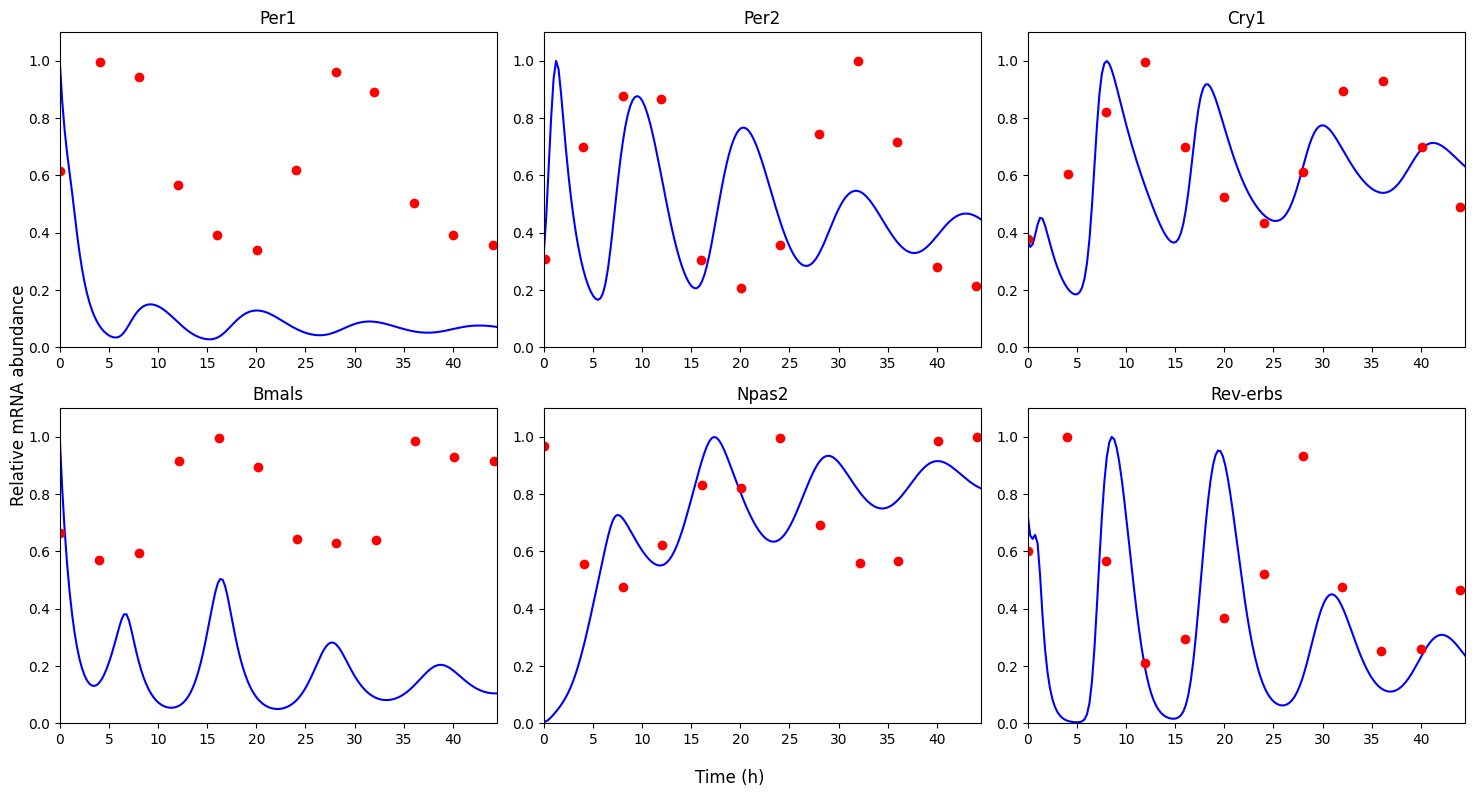

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].plot(t_span, our_Per1_mRNA, 'b-', mRNA['x'], mRNA['Per1'], 'ro')
axs[0, 0].set_xlim(0, 44.5)
axs[0, 0].set_ylim(0, 1.1)
axs[0, 0].set_title('Per1')

axs[0, 1].plot(t_span, our_Per2_mRNA, 'b-', mRNA['x.2'], mRNA['Per2'], 'ro')
axs[0, 1].set_xlim(0, 44.5)
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].set_title('Per2')

axs[0, 2].plot(t_span, our_Cry1_mRNA, 'b-', mRNA['x.3'], mRNA['Cry1'], 'ro')
axs[0, 2].set_xlim(0, 44.5)
axs[0, 2].set_ylim(0, 1.1)
axs[0, 2].set_title('Cry1')

axs[1, 0].plot(t_span, our_Bmals_mRNA, 'b-', mRNA['x.1'], mRNA['Bmals'], 'ro')
axs[1, 0].set_xlim(0, 44.5)
axs[1, 0].set_ylim(0, 1.1)
axs[1, 0].set_title('Bmals')

axs[1, 1].plot(t_span, our_Npas2_mRNA, 'b-', mRNA['x.4'], mRNA['Npas2'], 'ro')
axs[1, 1].set_xlim(0, 44.5)
axs[1, 1].set_ylim(0, 1.1)
axs[1, 1].set_title('Npas2')

axs[1, 2].plot(t_span, our_Rev_erbs_mRNA, 'b-', mRNA['x.5'], mRNA['Rev-erbs'], 'ro')
axs[1, 2].set_xlim(0, 44.5)
axs[1, 2].set_ylim(0, 1.1)
axs[1, 2].set_title('Rev-erbs')

fig.supxlabel('Time (h)')
fig.supylabel('Relative mRNA abundance')
plt.tight_layout()
plt.show()

#### 2nd round

In [ ]:
sec_best_params

array([ 3.25506231, 76.29841289, 72.14230883, 31.79065561, 44.1842038 ,
       58.32036485, 55.14432289,  4.15760962, 10.95621932,  1.40229963,
       -0.86533424,  3.29427291,  2.89192076,  1.33254275,  1.43733734,
        1.5656568 ,  3.94906085,  2.81341198,  1.60219779,  0.74839154,
        5.05408563,  4.98370809,  1.66409125,  6.0157564 ,  1.83050037,
       -1.09661783,  7.45839333,  6.53962896,  1.34276483,  4.14325946,
        3.56942954,  2.73389193,  4.32614493,  4.44704632,  1.11530581,
        1.53696542,  3.17387402,  9.31099956,  2.12898897,  5.16427124,
        1.23747869,  8.15077062,  1.5206703 ,  8.7189189 , -0.19523654,
        4.1916255 ,  1.17258148,  0.96411248,  1.34038956, -1.63210078,
        0.9028314 ,  0.50510421,  2.65364112,  2.97331249,  2.40775962,
       -1.2283685 , -0.83959167,  1.17100528, -1.58482752, -0.50193094,
       -0.57582138,  2.17789997, -1.20273339,  0.48236945,  2.30063336,
        1.64978291, -0.68983041,  3.01751247,  1.30048235,  1.95

In [ ]:
initial_conditions

[0.1, 0.1, 0.1, 0.1, 0.1]

In [ ]:
# Initial conditions
initial_conditions = initial_conditions

# Time span for the simulation
t_span = np.linspace(0, 45, 180)

# Parameters
parameters = sec_best_params

# Solve ODE
sec_our_sol = solve_detailed(initial_conditions, t_span, parameters)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
our_Per1_mRNA = relative_abundance(sec_our_sol,[10, 11]) #MnPo/McPo
our_Per2_mRNA = relative_abundance(sec_our_sol,[12, 13]) #MnPt/McPt
our_Cry1_mRNA = relative_abundance(sec_our_sol,[18, 19]) #MnRo/McRo
our_Bmals_mRNA = relative_abundance(sec_our_sol,[20, 21]) #MnB/McB
our_Npas2_mRNA = relative_abundance(sec_our_sol,[22, 23]) #MnNp/McNp
our_Rev_erbs_mRNA = relative_abundance(sec_our_sol,[16, 17]) #MnRev/McRev

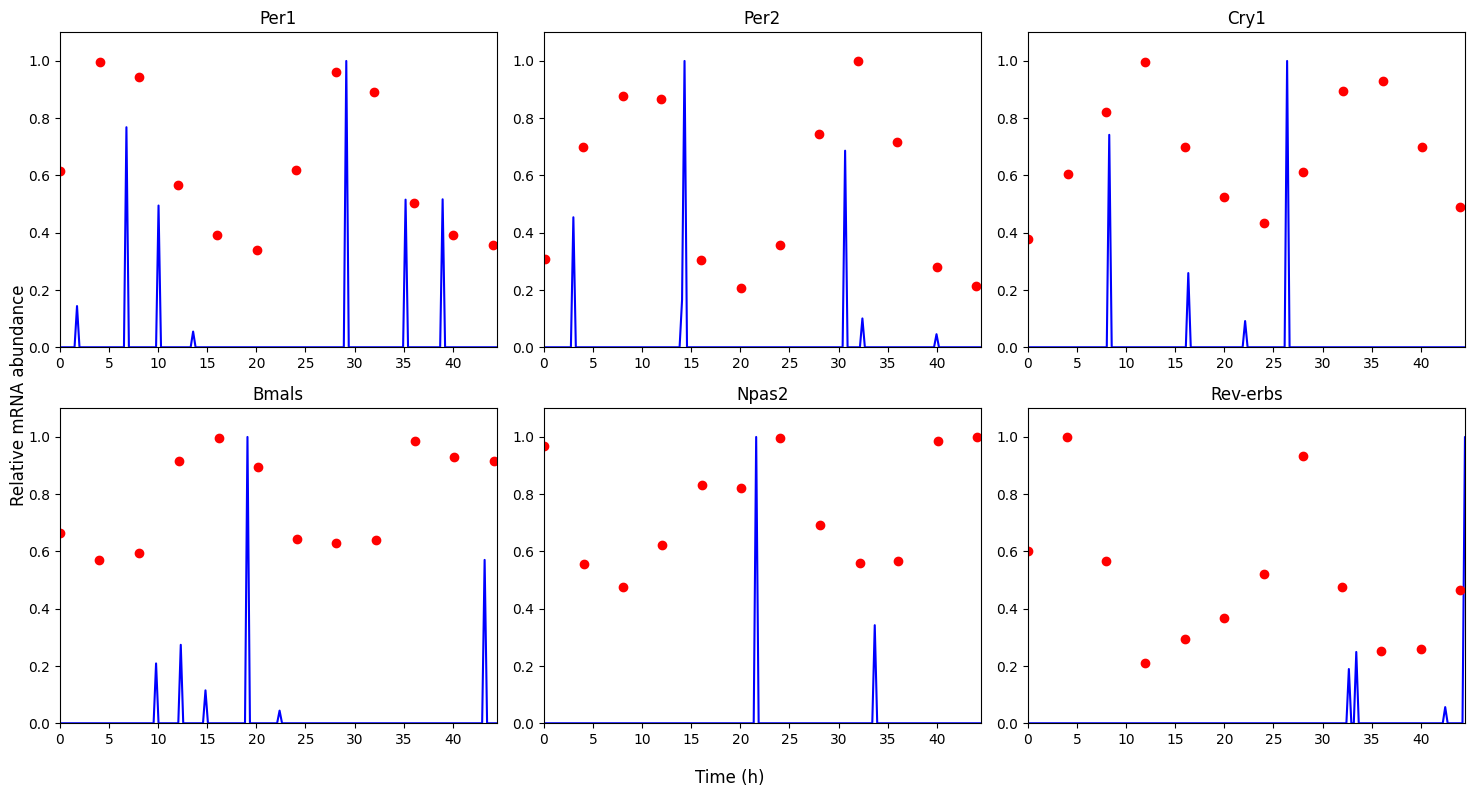

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].plot(t_span, our_Per1_mRNA, 'b-', mRNA['x'], mRNA['Per1'], 'ro')
axs[0, 0].set_xlim(0, 44.5)
axs[0, 0].set_ylim(0, 1.1)
axs[0, 0].set_title('Per1')

axs[0, 1].plot(t_span, our_Per2_mRNA, 'b-', mRNA['x.2'], mRNA['Per2'], 'ro')
axs[0, 1].set_xlim(0, 44.5)
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].set_title('Per2')

axs[0, 2].plot(t_span, our_Cry1_mRNA, 'b-', mRNA['x.3'], mRNA['Cry1'], 'ro')
axs[0, 2].set_xlim(0, 44.5)
axs[0, 2].set_ylim(0, 1.1)
axs[0, 2].set_title('Cry1')

axs[1, 0].plot(t_span, our_Bmals_mRNA, 'b-', mRNA['x.1'], mRNA['Bmals'], 'ro')
axs[1, 0].set_xlim(0, 44.5)
axs[1, 0].set_ylim(0, 1.1)
axs[1, 0].set_title('Bmals')

axs[1, 1].plot(t_span, our_Npas2_mRNA, 'b-', mRNA['x.4'], mRNA['Npas2'], 'ro')
axs[1, 1].set_xlim(0, 44.5)
axs[1, 1].set_ylim(0, 1.1)
axs[1, 1].set_title('Npas2')

axs[1, 2].plot(t_span, our_Rev_erbs_mRNA, 'b-', mRNA['x.5'], mRNA['Rev-erbs'], 'ro')
axs[1, 2].set_xlim(0, 44.5)
axs[1, 2].set_ylim(0, 1.1)
axs[1, 2].set_title('Rev-erbs')

fig.supxlabel('Time (h)')
fig.supylabel('Relative mRNA abundance')
plt.tight_layout()
plt.show()

## Figure 2

### Figure 2A

In [ ]:
Per1_mRNA = relative_abundance(dt_sol, [10, 11]) #MnPo/McPo
Per2_mRNA = relative_abundance(dt_sol, [12, 13]) #MnPt/McPt
Cry1_mRNA = relative_abundance(dt_sol, [18, 19]) #MnRo/McRo
Cry2_mRNA = relative_abundance(dt_sol, [14, 15]) #MnRt/McRt
Bmals_mRNA = relative_abundance(dt_sol, [20, 21]) #MnB/McB
Npas2_mRNA = relative_abundance(dt_sol,[22, 23]) #MnNp/McNp
Rev_erbs_mRNA = relative_abundance(dt_sol,[16, 17]) #MnRev/McRev

In [ ]:
t_span = np.linspace(0, 45, 180)

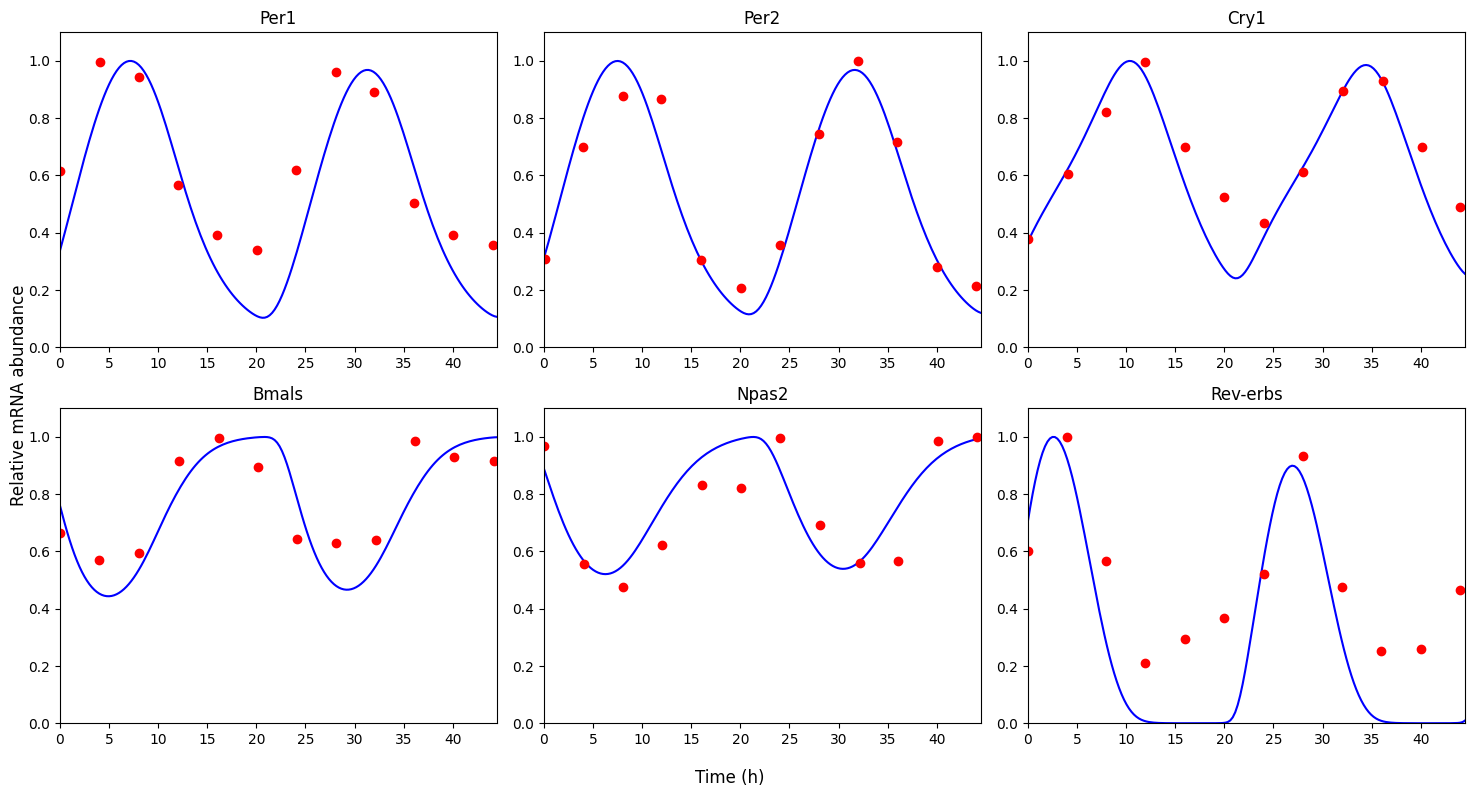

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].plot(t_span, Per1_mRNA, 'b-', mRNA['x'], mRNA['Per1'], 'ro')
axs[0, 0].set_xlim(0, 44.5)
axs[0, 0].set_ylim(0, 1.1)
axs[0, 0].set_title('Per1')

axs[0, 1].plot(t_span, Per2_mRNA, 'b-', mRNA['x.2'], mRNA['Per2'], 'ro')
axs[0, 1].set_xlim(0, 44.5)
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].set_title('Per2')

axs[0, 2].plot(t_span, Cry1_mRNA, 'b-', mRNA['x.3'], mRNA['Cry1'], 'ro')
axs[0, 2].set_xlim(0, 44.5)
axs[0, 2].set_ylim(0, 1.1)
axs[0, 2].set_title('Cry1')

axs[1, 0].plot(t_span, Bmals_mRNA, 'b-', mRNA['x.1'], mRNA['Bmals'], 'ro')
axs[1, 0].set_xlim(0, 44.5)
axs[1, 0].set_ylim(0, 1.1)
axs[1, 0].set_title('Bmals')

axs[1, 1].plot(t_span, Npas2_mRNA, 'b-', mRNA['x.4'], mRNA['Npas2'], 'ro')
axs[1, 1].set_xlim(0, 44.5)
axs[1, 1].set_ylim(0, 1.1)
axs[1, 1].set_title('Npas2')

axs[1, 2].plot(t_span, Rev_erbs_mRNA, 'b-', mRNA['x.5'], mRNA['Rev-erbs'], 'ro')
axs[1, 2].set_xlim(0, 44.5)
axs[1, 2].set_ylim(0, 1.1)
axs[1, 2].set_title('Rev-erbs')

fig.supxlabel('Time (h)')
fig.supylabel('Relative mRNA abundance')
plt.tight_layout()
plt.show()

### Figure 2B

In [ ]:
PER1_protein = protein_relative_abundance(dt_sol, PER1_protein_list)
PER2_protein = protein_relative_abundance(dt_sol, PER2_protein_list)
CRY1_protein = protein_relative_abundance(dt_sol, CRY1_protein_list)
CRY2_protein = protein_relative_abundance(dt_sol, CRY2_protein_list)

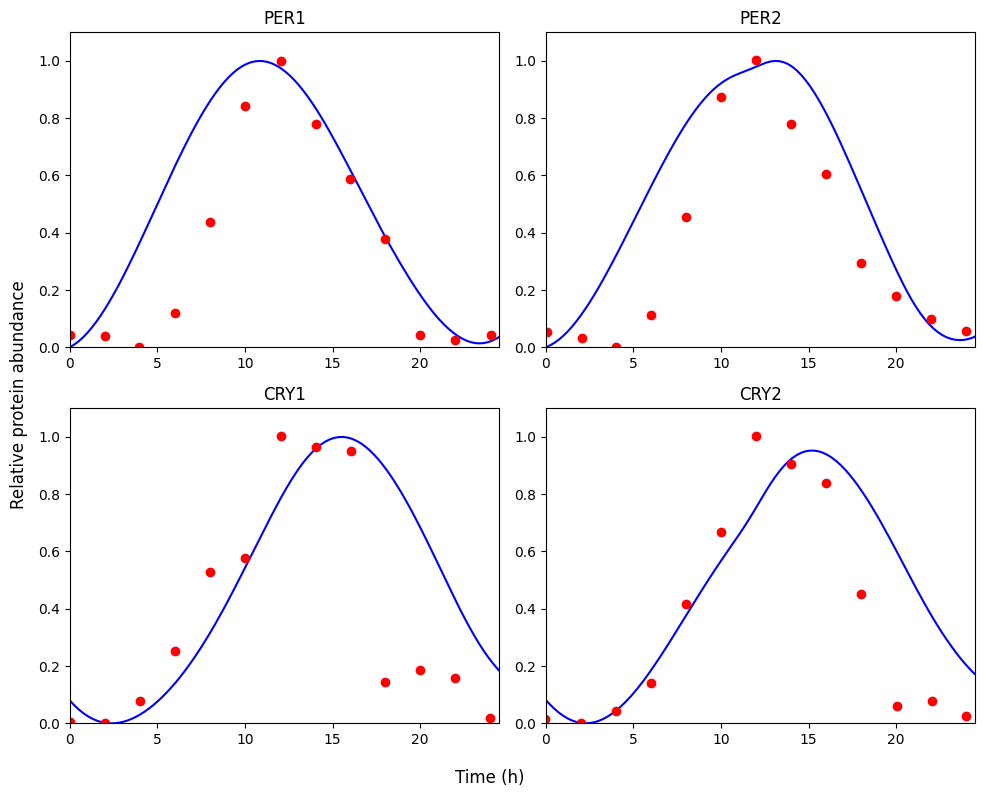

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(t_span, PER1_protein, 'b-', protein['x'], protein['PER1'], 'ro')
axs[0, 0].set_xlim(0, 24.5)
axs[0, 0].set_ylim(0, 1.1)
axs[0, 0].set_title('PER1')

axs[0, 1].plot(t_span, PER2_protein, 'b-', protein['x.1'], protein['PER2'], 'ro')
axs[0, 1].set_xlim(0, 24.5)
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].set_title('PER2')

axs[1, 0].plot(t_span, CRY1_protein, 'b-', protein['x.2'], protein['CRY1'], 'ro')
axs[1, 0].set_xlim(0, 24.5)
axs[1, 0].set_ylim(0, 1.1)
axs[1, 0].set_title('CRY1')

axs[1, 1].plot(t_span, CRY2_protein, 'b-', protein['x.3'], protein['CRY2'], 'ro')
axs[1, 1].set_xlim(0, 24.5)
axs[1, 1].set_ylim(0, 1.1)
axs[1, 1].set_title('CRY2')

fig.supxlabel('Time (h)')
fig.supylabel('Relative protein abundance')
plt.tight_layout()
plt.show()

## Figure 3

Homozygous and heterozygous knockouts
were simulated by reducing transcription rates by 100% and 50%, respectively.

* Transcription rate constant for Per1: **trPo**
* Transcription rate constant for of Per2: **trPt**
* Transcription rate constant for of Cry1: **trRo**
* Transcription rate constant for Cry2: **trRt**
* Transcription rate constant for of Bmal: **trB**
* Transcription rate constant for of Npas2: **trNp**
* Transcription rate constant for of Rev-Erbs: **trRev**

To simulate the Rev-erbα(-/-), we also reduced the transcription rate of the Rev-Erbs by 50%,
which represented both Rev-erbα and Rev-erb in our model. To model the Bmal1(-/-), we
reduced transcriptional rate of Bmals by 95%, which accounts for the low levels of Bmal2 when compared with Bmal1 (Ko et al, 2010). For the Clock(delta 19/+), the half of WT CLOCK proteins were mutated to be transcriptionally inactive, yet still competed with
the remaining WT CLOCK proteins.



### Knockout :)

In [ ]:
def knockout(variables, degree):
    # Initial conditions
    initial_conditions = initial_conditions

    # Time span for the simulation
    t_span = np.linspace(0, 75, 180)

    # Parameters
    parameters = [25.9201, 44.854, 23.0747, 39.9409, 46.1038, 102.923, 0.329749, 1.81031, 5.03882, 0.530436,
                  8.90744, 4.64589, 1.25099, 1.3962, 2.93521, 0.0456572, 0.108072, 0.0235285, 0.605268, 0.0454894,
                  7.27215, 6.92686, 0.130196, 6.59924, 0.304176, 0.162392, 6.97166, 0.255032, 0.0120525, 10.9741,
                  6.15445, 2.91009, 0.280863, 0.00886752, 0.00626588, 5.30559, 0.16426, 9.2631, 0.643086, 0.0269078,
                  9.63702, 0.0152514, 0.594609, 5.26501, 0.527453, 2.45584, 0.291429, 0.205813, 0.396392, 0.607387,
                  0.013, 0.644602, 0.0625777, 3.35063, 3.537, 0.17491, 0.481895, 0.369493, 0.766962, 0.58892,
                  0.403425, 0.455544, 0.0188002, 0.0251651, 0.348829, 0.0700322, 1.64876, 0.517303, 0.795402, 1.51019]

    if variables:
        for i in range(len(variables)):
            parameters[parameter_index[variables[i]]] *= degree[i]

    # Solve ODE
    sol = solve_detailed(initial_conditions, t_span, parameters)

    return sol

In [ ]:
wt = knockout(False, False)

In [ ]:
Cry1_homo = knockout(['trRo'], [0])
Cry2_homo = knockout(['trRt'], [0])
Per1_homo = knockout(['trPo'], [0])
Per2_homo = knockout(['trPt'], [0])
Per2_hetero = knockout(['trPt'], [0.5])
Bmal1_hetero = knockout(['trB'], [0.5])
Bmal1_homo = knockout(['trB'], [0.05])
Rev_a_homo = knockout(['trRev'], [0.5])
Rev_ab_homo = knockout(['trRev'], [0])
Clock_hetero = knockout(['binr', 'unbinr'],[2,0.5])
Clock_homo = knockout(['binr', 'unbinr'],[0,0])

### How does it look like in relative abundane

[ 18  74 130]
[ 18  80 141]


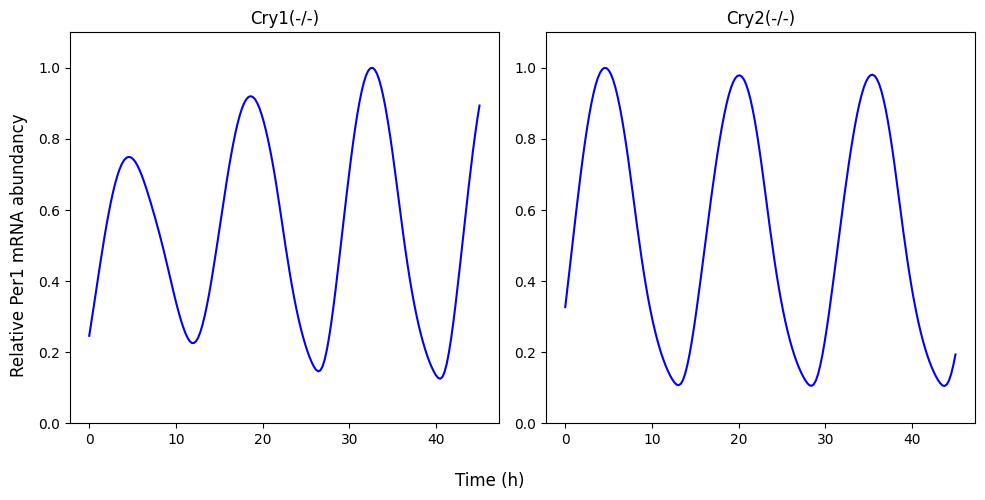

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#########
concentration = 0
for i in [10,11]:
    concentration += Cry1_homo.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration

peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[0].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[0, 0].set_xlim(0, 44.5)
axs[0].set_ylim(0, 1.1)
axs[0].set_title('Cry1(-/-)')
########

concentration = 0
for i in [10,11]:
    concentration += Cry2_homo.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration

peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[1].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[1].set_xlim(0, 44.5)
axs[1].set_ylim(0, 1.1)
axs[1].set_title('Cry2(-/-)')
########
fig.supxlabel('Time (h)')
fig.supylabel('Relative Per1 mRNA abundancy')
plt.tight_layout()
plt.show()

[ 19  77 135]
[ 27  88 146]
[ 20  77 133]


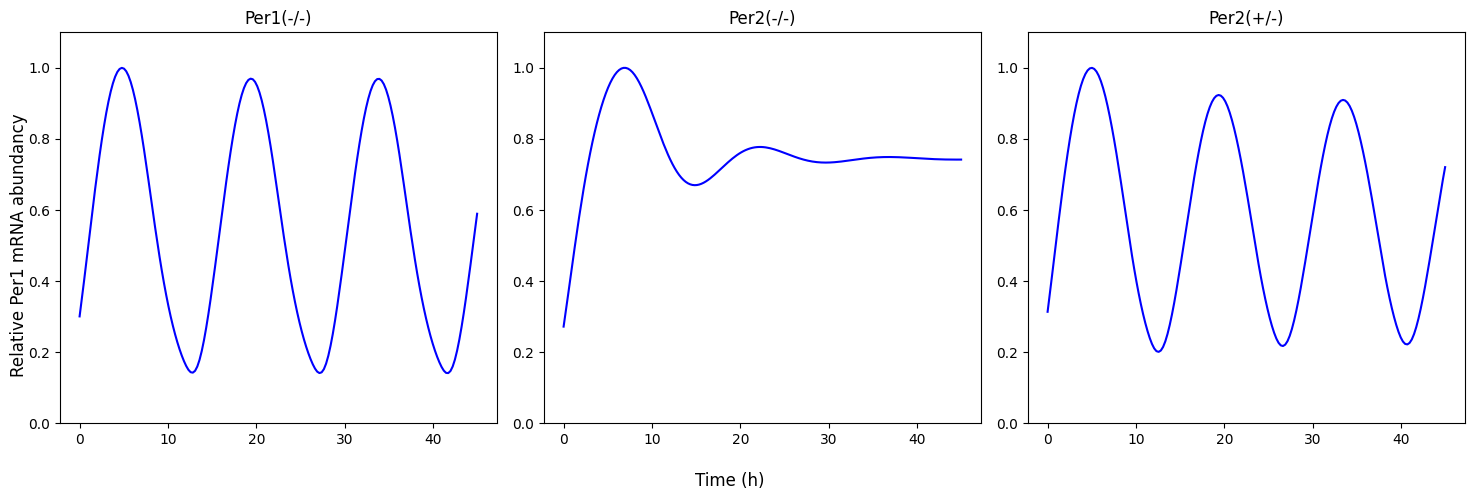

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

concentration = 0
for i in [12,13]:
    concentration += Per1_homo.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration
peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[0].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[0, 2].set_xlim(0, 44.5)
axs[0].set_ylim(0, 1.1)
axs[0].set_title('Per1(-/-)')
########

concentration = 0
for i in [10,11]:
    concentration += Per2_homo.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration
peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[1].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[1].set_xlim(0, 44.5)
axs[1].set_ylim(0, 1.1)
axs[1].set_title('Per2(-/-)')

concentration = 0
for i in [10,11]:
    concentration += Per2_hetero.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration
peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[2].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[2].set_xlim(0, 44.5)
axs[2].set_ylim(0, 1.1)
axs[2].set_title('Per2(+/-)')

fig.supxlabel('Time (h)')
fig.supylabel('Relative Per1 mRNA abundancy')
plt.tight_layout()
plt.show()

[ 16  78 137]
[ 17  76 133]
[ 17  74 130]
[ 17  75 132]


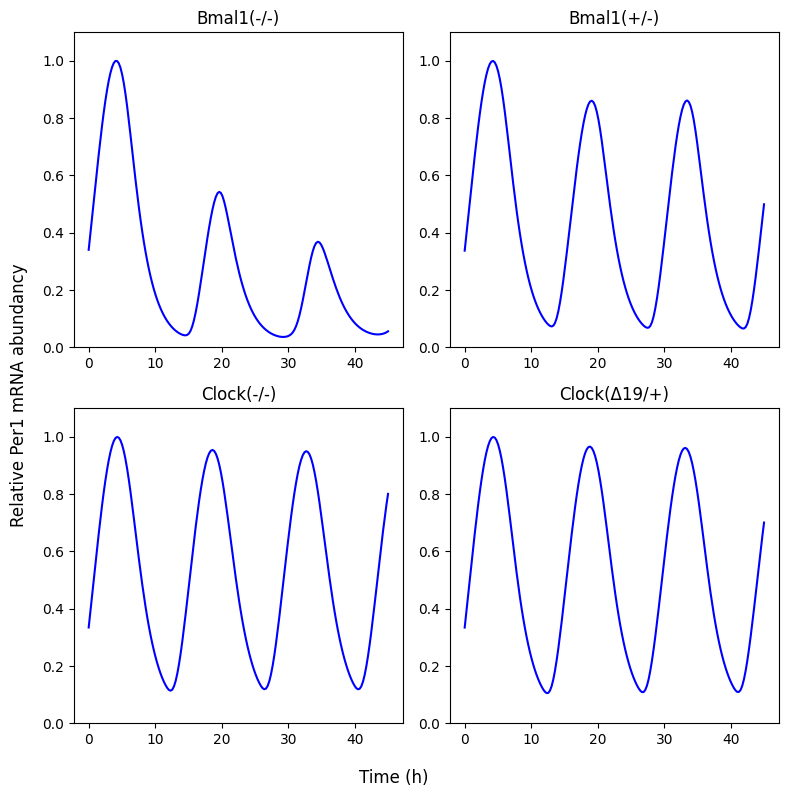

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

concentration = 0
for i in [10,11]:
    concentration += Bmal1_homo.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration
peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[0,0].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[0, 2].set_xlim(0, 44.5)
axs[0,0].set_ylim(0, 1.1)
axs[0,0].set_title('Bmal1(-/-)')
########

concentration = 0
for i in [10,11]:
    concentration += Bmal1_hetero.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration
peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[0,1].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[0,1].set_xlim(0, 44.5)
axs[0,1].set_ylim(0, 1.1)
axs[0,1].set_title('Bmal1(+/-)')

concentration = 0
for i in [10,11]:
    concentration += Clock_homo.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration
peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[1,0].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[1,0].set_xlim(0, 44.5)
axs[1,0].set_ylim(0, 1.1)
axs[1,0].set_title('Clock(-/-)')

concentration = 0
for i in [10,11]:
    concentration += Clock_hetero.T[i]
max_concentration = concentration.max()
relative_abundance = concentration / max_concentration
peaks, _ = find_peaks(relative_abundance)
print(peaks)

axs[1,1].plot(np.linspace(0, 45, 180), relative_abundance, 'b-')
#axs[1,0].set_xlim(0, 44.5)
axs[1,1].set_ylim(0, 1.1)
axs[1,1].set_title('Clock(Δ19/+)')

fig.supxlabel('Time (h)')
fig.supylabel('Relative Per1 mRNA abundancy')
plt.tight_layout()
plt.show()

### Stoichiometry Calculator

Here, we define stoichiometry as the average ratio between the concentration of repressors (all forms of PER and CRY in the nucleus) to that of activators (all forms of BMAL–CLOCK/NPAS2 in the nucleus) over a period.

In [ ]:
def count_intersections(y, threshold=0.7):
    intersections = np.sum(np.diff((y > threshold).astype(int)) != 0)
    return intersections

def has_rhythm(y, threshold=0.7, min_intersections=4):
    intersections = count_intersections(y, threshold)
    return intersections >= min_intersections

In [ ]:
def stoichiometry_calculator(sol, Per1):
    # 핵 내 억제제와 활성화제의 농도 데이터
    activator_con = 0
    for i in variables_dict.keys():
        if  i[-2:] == "11" :
            activator_con +=  sol.T[variables_dict[i]]

    repressor_con = 0
    for i in variables_dict.keys():
        if  i[1:3] != '00':
            if i[-2:] == '10' or i[-2:] == '11' :
                repressor_con +=  sol.T[variables_dict[i]]

    # stoichiometry 계산
    stoichiometry = np.mean(repressor_con / activator_con)

    def relative_abundance(list):
        concentration = 0
        for i in list:
            concentration += sol.T[i]
        max_concentration = concentration.max()
        relative_abundance = concentration / max_concentration
        return relative_abundance

    # "We plot the stoichiometry predicted by our model in these mutants with the relative amplitude of Per1 mRNA rhythm"
    if Per1:
        Per_mRNA = relative_abundance([10,11]) #MnPo/McPo
    else: #if the knockdown on Per1, show with the relative amplitude of Per2 mRNA rhythm
        Per_mRNA = relative_abundance([12,13])

    def calculate_absolute_amplitude(solution):
        P = solution
        peaks, _ = find_peaks(P, distance=10)  # Find peaks with a minimum distance of 10
        valleys, _ = find_peaks(-P, distance=10)  # Find valleys with a minimum distance of 10
        amplitudes = []

        # Ensure there are enough peaks and valleys to compare
        if len(peaks) > 1 and len(valleys) > 1:
            for i in range(min(len(peaks), len(valleys)) - 1):
                peak = P[peaks[i]]
                valley = P[valleys[i]]
                amplitudes.append(abs(peak - valley))

        return np.mean(amplitudes) if amplitudes else 0

    if not has_rhythm(Per_mRNA):
        relative_amplitude = 0.0
    else:
        relative_amplitude = calculate_absolute_amplitude(Per_mRNA)


    print(f"Stoichiometry: {stoichiometry:.2f}, Relative amplitude: {relative_amplitude:.2f}")
    return (stoichiometry, relative_amplitude)



### Figure 3A

In [ ]:
stochiometry_wt = stoichiometry_calculator(wt, True)
stochiometry_Cry1_homo = stoichiometry_calculator(Cry1_homo, True)
stochiometry_Cry2_homo = stoichiometry_calculator(Cry2_homo, True)
stochiometry_Per1_homo = stoichiometry_calculator(Per1_homo, False)
stochiometry_Per2_homo = stoichiometry_calculator(Per2_homo, True)
stochiometry_Per2_hetero = stoichiometry_calculator(Per2_hetero, True)
stochiometry_Bmal1_hetero = stoichiometry_calculator(Bmal1_hetero, True)
stochiometry_Bmal1_homo = stoichiometry_calculator(Bmal1_homo, True,)
stochiometry_Clock_hetero = stoichiometry_calculator(Clock_hetero, True)
stochiometry_Clock_homo = stoichiometry_calculator(Clock_homo, True)

Stoichiometry: 0.92, Relative amplitude: 0.88
Stoichiometry: 0.85, Relative amplitude: 0.65
Stoichiometry: 0.91, Relative amplitude: 0.88
Stoichiometry: 0.87, Relative amplitude: 0.84
Stoichiometry: 0.65, Relative amplitude: 0.00
Stoichiometry: 0.79, Relative amplitude: 0.75
Stoichiometry: 1.10, Relative amplitude: 0.86
Stoichiometry: 1.63, Relative amplitude: 0.00
Stoichiometry: 0.91, Relative amplitude: 0.88
Stoichiometry: 0.88, Relative amplitude: 0.86


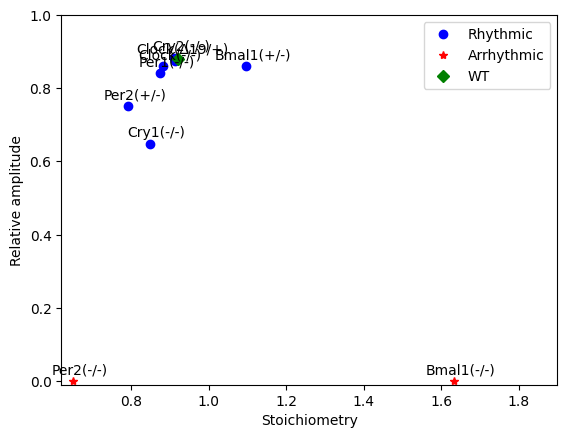

In [ ]:
rhythmic = np.array([stochiometry_Cry1_homo, stochiometry_Cry2_homo, stochiometry_Per1_homo, stochiometry_Per2_hetero, stochiometry_Bmal1_hetero, stochiometry_Clock_hetero, stochiometry_Clock_homo])
arrhythmic = np.array([stochiometry_Per2_homo, stochiometry_Bmal1_homo])

plt.plot(rhythmic.T[0], rhythmic.T[1], "bo", label = "Rhythmic")
plt.plot(arrhythmic.T[0], arrhythmic.T[1], "r*", label = "Arrhythmic")
plt.plot(np.array(stochiometry_wt).T[0],np.array(stochiometry_wt).T[1], "gD" ,label = "WT")


plt.xlabel('Stoichiometry')
plt.ylabel('Relative amplitude')
plt.ylim(-0.01,1)
plt.xlim(0.62,1.9)

gene_labels = ["Cry1(-/-)", "Cry2(-/-)", "Per1(-/-)", "Per2(+/-)",  "Bmal1(+/-)", "Clock(Δ19/+)", "Clock(-/-)" ]
for i, label in enumerate(gene_labels):
    plt.annotate(label, (rhythmic[i, 0], rhythmic[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')
gene_labels = ["Per2(-/-)", "Bmal1(-/-)" ]
for i, label in enumerate(gene_labels):
    plt.annotate(label, (arrhythmic[i, 0], arrhythmic[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.legend()
plt.show()

### Figure 3B

In [ ]:
def calculate_oscillation_amplitude(solution):
    P = solution[:, 2]
    peaks, _ = find_peaks(P, distance=10)  # Find peaks with a minimum distance of 10
    valleys, _ = find_peaks(-P, distance=10)  # Find valleys with a minimum distance of 10
    amplitudes = []
    for i in range(len(peaks) - 1):
        peak1 = P[peaks[i]]
        valley = P[valleys[i]]
        peak2 = P[peaks[i + 1]]
        amplitudes.append(abs(peak1 - valley))
        amplitudes.append(abs(peak2 - valley))

    return np.mean(amplitudes)

# Varying parameters
transcription_rate = np.linspace(0, 4, 40)
cnt = 0

Genes = [['trB', 'binr', 'unbinr'], ['trPt']]

amplitude_list = [[] for _ in range(len(Genes))]
stoichiometry_list = [[] for _ in range(len(Genes))]

for gene in Genes:
    stoichiometry_list[cnt] = []
    amplitude_list[cnt] = []
    for A in transcription_rate:
        sol = knockout(gene, [A]* len(gene))
        stoichiometry, amplitude  = stoichiometry_calculator(sol, True)
        stoichiometry_list[cnt].append(stoichiometry)
        if amplitude > 0.007:
            amplitude_list[cnt].append(amplitude)
        else:
            amplitude_list[cnt].append(0.0)
    cnt += 1

Stoichiometry: 2.09, Relative amplitude: 0.00
Stoichiometry: 1.40, Relative amplitude: 0.00
Stoichiometry: 1.28, Relative amplitude: 0.00
Stoichiometry: 1.21, Relative amplitude: 0.82
Stoichiometry: 1.14, Relative amplitude: 0.85
Stoichiometry: 1.08, Relative amplitude: 0.86
Stoichiometry: 1.03, Relative amplitude: 0.87
Stoichiometry: 1.00, Relative amplitude: 0.87
Stoichiometry: 0.97, Relative amplitude: 0.88
Stoichiometry: 0.94, Relative amplitude: 0.88
Stoichiometry: 0.92, Relative amplitude: 0.88
Stoichiometry: 0.90, Relative amplitude: 0.88
Stoichiometry: 0.88, Relative amplitude: 0.88
Stoichiometry: 0.87, Relative amplitude: 0.87
Stoichiometry: 0.86, Relative amplitude: 0.87
Stoichiometry: 0.85, Relative amplitude: 0.86
Stoichiometry: 0.84, Relative amplitude: 0.86
Stoichiometry: 0.84, Relative amplitude: 0.85
Stoichiometry: 0.83, Relative amplitude: 0.85
Stoichiometry: 0.83, Relative amplitude: 0.84
Stoichiometry: 0.82, Relative amplitude: 0.83
Stoichiometry: 0.82, Relative ampl

In [ ]:
print("stoichiometry:", stoichiometry_list)
print("Relative Amplitude:", amplitude_list)

stoichiometry: [[2.085976736150784, 1.3996606110388123, 1.284705544702652, 1.2090357520100834, 1.1383986012703937, 1.0808555008999567, 1.0345143128989789, 0.9967110197988465, 0.9654417423842858, 0.9393094170052396, 0.917341290209615, 0.8988417688309042, 0.8832861870776444, 0.8702477547412447, 0.8593535128094497, 0.8502652600241104, 0.8426773493773575, 0.8363211083387344, 0.830968262591912, 0.8264304930861425, 0.8225557576049368, 0.819222948540235, 0.8163363146699246, 0.8138203604422474, 0.8116154784069156, 0.809674406020958, 0.8079593870408643, 0.8064399400931933, 0.8050911286169838, 0.8038922233668492, 0.8028256727160404, 0.8018763117469152, 0.8010307594435334, 0.8002769623906276, 0.7996038504070134, 0.7990010981407178, 0.7984589635728041, 0.7979682059789854, 0.7975200816454735, 0.7971063919865398], [0.6508251670820197, 0.6910692312059492, 0.7242528972089624, 0.7546458276907202, 0.7739912431828322, 0.7959230202363387, 0.8209942329559528, 0.8474004025789431, 0.874414663548697, 0.901781

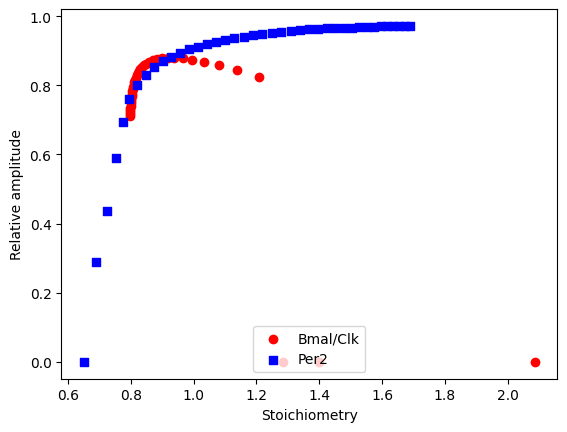

In [ ]:
plt.figure()

plt.scatter(stoichiometry_list[0], amplitude_list[0], marker = "o", color = "r", label = "Bmal/Clk")
plt.scatter(stoichiometry_list[1], amplitude_list[1], marker = "s", color = "b", label = "Per2")

plt.xlabel('Stoichiometry')
#plt.xlim(0.69, 1.85)
plt.ylabel('Relative amplitude')
plt.legend(loc = "lower center")
plt.show()

### Figure 3D

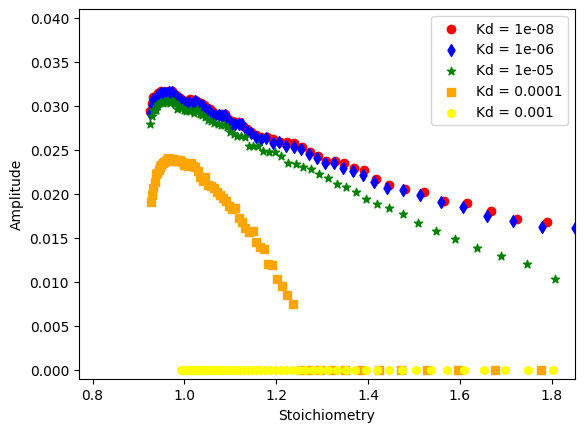

In [ ]:
def calculate_oscillation_amplitude(solution):
    P = solution[:, 2]
    peaks, _ = find_peaks(P, distance=10)  # Find peaks with a minimum distance of 10
    valleys, _ = find_peaks(-P, distance=10)  # Find valleys with a minimum distance of 10
    amplitudes = []
    for i in range(len(peaks) - 1):
        peak1 = P[peaks[i]]
        valley = P[valleys[i]]
        peak2 = P[peaks[i + 1]]
        amplitudes.append(abs(peak1 - valley))
        amplitudes.append(abs(peak2 - valley))

    return np.mean(amplitudes)

if __name__ == "__main__":
    # Initial conditions
    initial_conditions = [0.1, 0.1, 0.1]

    # Time span for the simulation
    t_span = np.linspace(0, 48, 100)

    # Fixed parameters
    ao, at, ah, bo, bt, bh = 1, 1, 1, 1, 1, 1

    # Varying parameters
    A_values = np.linspace(0.01, 0.1, 70)
    Kd_values = [1e-8, 1e-6, 1e-5, 1e-4, 1e-3]
    combination = {}
    plt.figure()
    markers = ['o', 'd', '*', 's', 'h']
    colors = ['r', 'b', 'g', 'orange', 'yellow']
    cnt = 0

    for Kd in Kd_values:

        amplitude_list = []
        stoichiometry_list = []
        for A in A_values:
            parameters = [ao, at, ah, bo, bt, bh, A, Kd]
            sol = solve_SNF(initial_conditions, t_span, parameters)
            stoichiometry = np.mean(sol[:, 2] / A)
            amplitude = calculate_oscillation_amplitude(sol)
            stoichiometry_list.append(stoichiometry )
            if amplitude > 0.007:
                amplitude_list.append(amplitude)
            else:
                amplitude_list.append(0.0)
            #plt.figure()
            #plt.plot(t_span, sol.T[2])
            #plt.show()
        plt.scatter(stoichiometry_list, amplitude_list, marker=markers[cnt], color=colors[cnt], label=f'Kd = {Kd}')
        cnt += 1

plt.xlabel('Stoichiometry')
plt.xlim(0.77, 1.85)
plt.ylim(-0.001, 0.041)
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Figure 4

In [ ]:
# Example usage
def knockout(variables, degree):
    # Initial conditions
    initial_conditions = [0.787955, 0.210048, 0.558565, 0.416217, 0.804404, 0.193886, 0.39359, 0.599965, 0.404247, 0.589308,
                          4.18947, 0.579108, 8.34963, 1.41168, 12.3735, 4.47054, 31.869, 161.144, 3.76085, 1.09547,
                          35.1842, 8.56043, 0.520367, 0.25596, 23.7741, 48.0977, 6.5815, 123.95, 467.844, 0.193289,
                          58.2391, 0.0397137, 19.0662, 0.11012, 67.6175, 1.13837, 0.342061, 8.17977, 50.5794, 3.08486,
                          0.0985802, 1.30846, 41.1658, 0.0156084, 8.72089, 46.5721, 0.0031953, 1.36799, 0.422898, 1.09254,
                          0.00181722, 5.19698e-05, 0.00512223, 0.106575, 0.000833073, 0.0566636, 0.00329174, 1.4996e-05, 0.00543134, 0.0876909,
                          0.000333744, 0.0548927, 0.00348546, 1.54312e-05, 0.00510457, 0.0938758, 0.000353611, 0.0535918, 0.914365, 0.664039,
                          0.0226162, 0.0241531, 0.00356643, 1.94469e-05, 0.000959363, 0.258442, 0.000985386, 0.0249991, 0.000157103, 1.1242e-05,
                          0.00132337, 0.0105914, 0.00023062, 0.025311, 0.00390694, 1.34882e-05, 0.000809309, 0.124712, 0.000416813, 0.0148919,
                          0.000188833, 1.79979e-06, 0.00109293, 0.00584769, 4.35837e-05, 0.0166107, 0.00428454, 1.47716e-05, 0.00086132, 0.137696,
                          0.000459811, 0.0160349, 0.0002068, 1.94018e-06, 0.0011516, 0.00644626, 4.76349e-05, 0.0177021, 0.00569806, 0.000190832,
                          0.0566834, 0.0287569, 0.000413832, 0.0494651, 0.00414505, 0.000386223, 0.124464, 0.00740796, 0.000654378, 0.104089,
                          0.00666974, 2.54221e-05, 0.00484524, 0.0828541, 0.000294564, 0.0323573, 0.0012142, 1.1508e-05, 0.00976858, 0.0087474,
                          7.98494e-05, 0.0607878, 0.00706385, 2.64292e-05, 0.00442251, 0.0852703, 0.000300906, 0.0301143, 0.00132641, 1.12497e-05,
                          0.00878991, 0.0091505, 7.78605e-05, 0.055586, 0.000792825, 2.57804e-05, 0.00334582, 0.0274125, 0.000385498, 0.0589937,
                          0.000125512, 4.99769e-05, 0.00735186, 0.00550233, 0.000631987, 0.12768, 0.00252101, 1.00779e-05, 0.00248103, 0.0581233,
                          0.000207429, 0.0239137, 0.000305307, 4.90217e-06, 0.00521949, 0.00753943, 6.39585e-05, 0.0471435, 0.00259772, 1.01709e-05,
                          0.00224807, 0.0602479, 0.000213449, 0.0225783, 0.000320067, 4.60372e-06, 0.004701, 0.00797183, 6.35261e-05, 0.0440794]

    # Time span for the simulation
    t_span = np.linspace(0, 75, 300)

    # Parameters
    parameters = [25.9201, 44.854, 23.0747, 39.9409, 46.1038, 102.923, 0.329749, 1.81031, 5.03882, 0.530436,
                  8.90744, 4.64589, 1.25099, 1.3962, 2.93521, 0.0456572, 0.108072, 0.0235285, 0.605268, 0.0454894,
                  7.27215, 6.92686, 0.130196, 6.59924, 0.304176, 0.162392, 6.97166, 0.255032, 0.0120525, 10.9741,
                  6.15445, 2.91009, 0.280863, 0.00886752, 0.00626588, 5.30559, 0.16426, 9.2631, 0.643086, 0.0269078,
                  9.63702, 0.0152514, 0.594609, 5.26501, 0.527453, 2.45584, 0.291429, 0.205813, 0.396392, 0.607387,
                  0.013, 0.644602, 0.0625777, 3.35063, 3.537, 0.17491, 0.481895, 0.369493, 0.766962, 0.58892,
                  0.403425, 0.455544, 0.0188002, 0.0251651, 0.348829, 0.0700322, 1.64876, 0.517303, 0.795402, 1.51019]

    if variables:
        for i in range(len(variables)):
            parameters[parameter_index[variables[i]]] *= degree[i]

    # Solve ODE
    sol = solve_detailed(initial_conditions, t_span, parameters)

    return sol

In [ ]:
wt = knockout(False, False)
Cry1_homo = knockout(['trRo'], [0])
Clock_homo = knockout(['binr', 'unbinr'],[0,0])
Rev_a_homo = knockout(['trRev'], [0.5])
Rev_ab_homo = knockout(['trRev'], [0])

In [ ]:
def Figure4C(data,variables):
    concentration = 0
    for i in variables:
        i = variables_dict[i]
        concentration += data.T[i]
    max_concentration = concentration.max()
    relative_abundance = concentration / max_concentration
    return relative_abundance

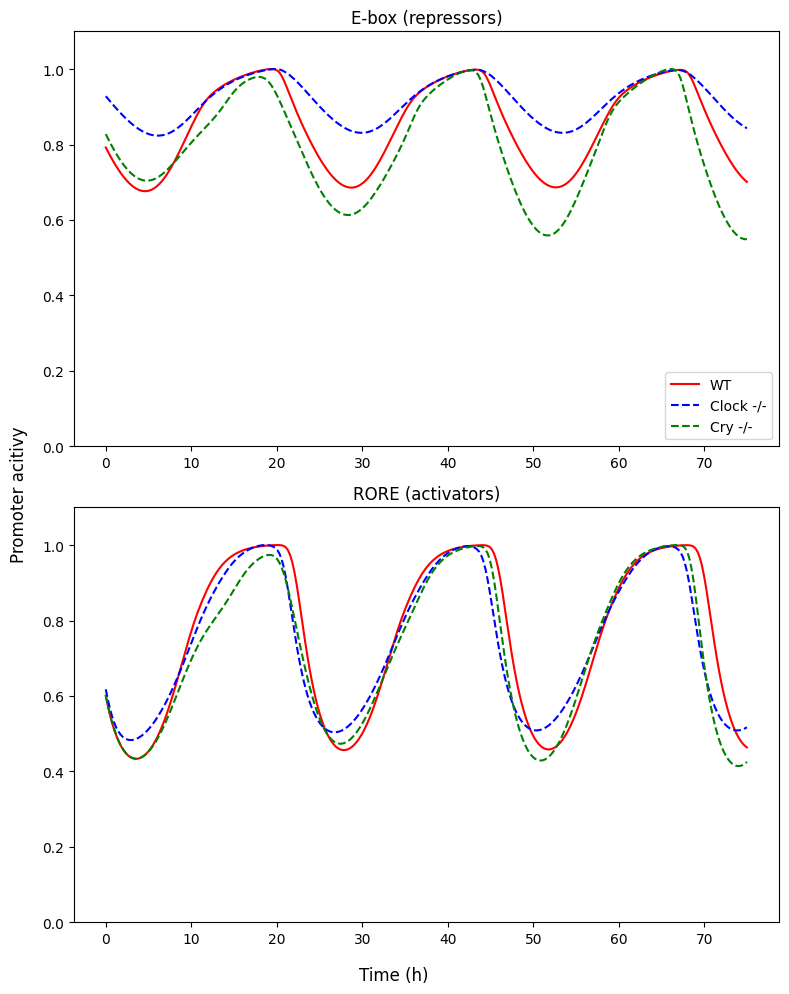

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

axs[0].plot(np.linspace(0, 75, 300), Figure4C(wt,['GR','GcR','GrR']), 'r-')
axs[0].plot(np.linspace(0, 75, 300), Figure4C(Clock_homo,['GR','GcR','GrR']), 'b--')
axs[0].plot(np.linspace(0, 75, 300), Figure4C(Cry1_homo,['GR','GcR','GrR']), 'g--')

axs[0].legend(["WT", "Clock -/-", "Cry -/-"], loc = 'lower right')
#axs[0, 0].set_xlim(0, 44.5)
axs[0].set_ylim(0, 1.1)
axs[0].set_title('E-box (repressors)')

########

axs[1].plot(np.linspace(0, 75, 300), Figure4C(wt,['GB','GBb']), 'r-')
axs[1].plot(np.linspace(0, 75, 300), Figure4C(Clock_homo,['GB','GBb']), 'b--')
axs[1].plot(np.linspace(0, 75, 300), Figure4C(Cry1_homo,['GB','GBb']), 'g--')
#axs[1].set_xlim(0, 44.5)
axs[1].set_ylim(0, 1.1)
axs[1].set_title('RORE (activators)')
########
fig.supxlabel('Time (h)')
fig.supylabel('Promoter acitivy')
plt.tight_layout()
plt.show()

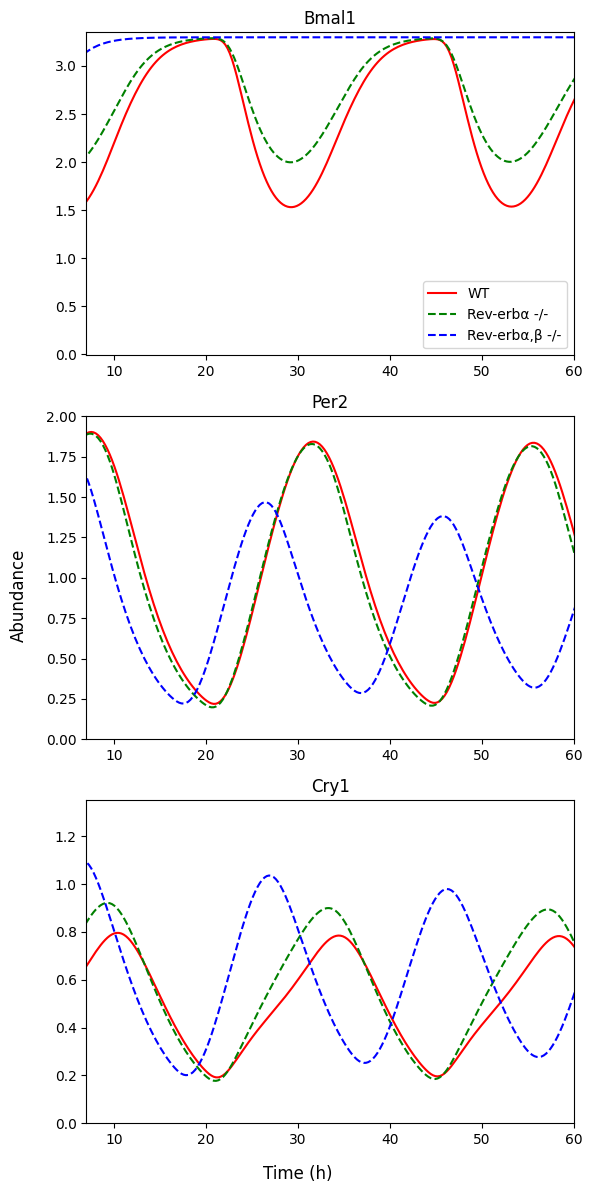

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

def concentration(data,variables):
    concentration = 0
    for i in variables:
        i = variables_dict[i]
        concentration += data.T[i]
    return concentration

wt_Per2 = np.mean(concentration(wt,['MnPt','McPt']))

def wt_normalizer(data,variables):
    return concentration(data,variables)  / wt_Per2

axs[0].plot(np.linspace(0, 75, 300), wt_normalizer(wt,['MnB','McB'])*0.95, 'r-')
axs[0].plot(np.linspace(0, 75, 300), wt_normalizer(Rev_a_homo,['MnB','McB'])*0.95, 'g--')
axs[0].plot(np.linspace(0, 75, 300), wt_normalizer(Rev_ab_homo,['MnB','McB'])*0.95, 'b--')
axs[0].set_xlim(7, 60)
axs[0].legend(["WT", "Rev-erbα -/-", "Rev-erbα,β -/-"], loc = 'lower right')
axs[0].set_ylim(-0.01, 3.35)
axs[0].set_title('Bmal1')

########
axs[1].plot(np.linspace(0, 75, 300), wt_normalizer(wt,['MnPt','McPt']), 'r-')
axs[1].plot(np.linspace(0, 75, 300), wt_normalizer(Rev_a_homo,['MnPt','McPt']), 'g--')
axs[1].plot(np.linspace(0, 75, 300), wt_normalizer(Rev_ab_homo,['MnPt','McPt']), 'b--')
axs[1].set_xlim(7, 60)
axs[1].set_ylim(0, 2)
axs[1].set_title('Per2')
########

axs[2].plot(np.linspace(0, 75, 300), wt_normalizer(wt,['MnRo','McRo']), 'r-')
axs[2].plot(np.linspace(0, 75, 300), wt_normalizer(Rev_a_homo,['MnRo','McRo']), 'g--')
axs[2].plot(np.linspace(0, 75, 300), wt_normalizer(Rev_ab_homo,['MnRo','McRo']), 'b--')
axs[2].set_xlim(7, 60)
axs[2].set_ylim(0, 1.35)
axs[2].set_title('Cry1')

fig.supxlabel('Time (h)')
fig.supylabel('Abundance')
plt.tight_layout()
plt.show()

## Figure 6

In [ ]:
### Model edited:
# NNF model
def NNF_model(statevector, t, alpha):
    M, Pc, P, R, A= statevector

    # Transformed variables
    M_tilde = M / alpha
    Pc_tilde = Pc / alpha
    P_tilde = P / alpha

    # Differential equations
    dM_dt = 1 - P_tilde / A - M_tilde
    dPc_dt = M_tilde - Pc_tilde
    dP_dt = Pc_tilde - P_tilde
    dR_dt = alpha * (A - P_tilde - 1e05 + np.sqrt((A - P_tilde - 1e05)**2 + 4 * P_tilde * 1e05 )) / (2 * A) - 0.2 * R
    A_dot = alpha / R - 0.2 * A

    return [dM_dt, dPc_dt, dP_dt, dR_dt, A_dot]
# PNF model
def PNF_model(statevector, t, alpha):
    M, Pc, P, R, A = statevector

    # Transformed variables
    M_tilde = M / alpha
    Pc_tilde = Pc / alpha
    P_tilde = P / alpha

    # Differential equations
    dM_dt = 1 - P_tilde / A - M_tilde
    dPc_dt = M_tilde - Pc_tilde
    dP_dt = Pc_tilde - P_tilde
    dR_dt = alpha * (A - P_tilde - 1e05 + np.sqrt((A - P_tilde - 1e05)**2 + 4 * P_tilde * 1e05)) / (2 * A) - 0.2 * R
    A_dot = alpha * R - 0.2 * A

    return [dM_dt, dPc_dt, dP_dt, dR_dt,A_dot]



In [ ]:
def solve_NNF(initial_conditions, t_span, parameters):
    sol = odeint(NNF_model, initial_conditions, t_span, args=(parameters,))
    return sol
def solve_PNF(initial_conditions, t_span, parameters):
    sol = odeint(PNF_model, initial_conditions, t_span, args=(parameters,))
    return sol

In [ ]:
def calculate_period(sol, threshold=0.5):
    P_tilde = sol[:, 2]  # Scaled protein concentrations
    periods = []
    start_idx = 0
    while start_idx < len(P_tilde) - 1:
        # Find the next peak
        peak_idx = np.argmax(P_tilde[start_idx:]) + start_idx
        if peak_idx == start_idx:
            break

        # Find the next trough
        trough_idx = start_idx + np.argmin(P_tilde[start_idx:peak_idx])

        # Calculate period
        period = t_span[peak_idx] - t_span[trough_idx]
        periods.append(period)

        start_idx = peak_idx

    return np.mean(periods) if periods else np.nan

In [ ]:
# Initial conditions
initial_conditions = [0.1, 0.1, 0.1, 0.1, 0.1]

# Time span
t_span = np.linspace(0, 48, 100)

# Transcription rates
transcription_rates = np.linspace(0.01, 2, 200)

# Unperturbed period
sol_unperturbed = solve_NNF(initial_conditions, t_span, 1)
PNF_sol_unperturbed = solve_PNF(initial_conditions, t_span, 1)
period_unperturbed = calculate_period(sol_unperturbed)
PNF_period_unperturbed = calculate_period(PNF_sol_unperturbed)

# Calculate periods for different transcription rates
periods = np.zeros((len(transcription_rates), len(transcription_rates)))
PNF_periods = np.zeros((len(transcription_rates), len(transcription_rates)))

for i, alpha_activator in enumerate(transcription_rates):
    for j, alpha_repressor in enumerate(transcription_rates):
        alpha = alpha_repressor / alpha_activator
        sol = solve_NNF(initial_conditions, t_span, alpha)
        PNF_sol = solve_PNF(initial_conditions, t_span, alpha)
        period = calculate_period(sol)
        period_PNF = calculate_period(PNF_sol)
        if np.isnan(period) or period_unperturbed == 0 or period / period_unperturbed < 1 or period / period_unperturbed > 2:
            periods[i, j] = 0
        else:
            periods[i, j] = period / period_unperturbed  # Convert to fold change
        if np.isnan(period_PNF) or PNF_period_unperturbed == 0 or period_PNF / PNF_period_unperturbed < 1 or period_PNF / PNF_period_unperturbed > 2:
            PNF_periods[i, j] = 0
        else:
            PNF_periods[i, j] = period_PNF / PNF_period_unperturbed  # Convert to fold change

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-39-cd9fa79c54a4>:32: RuntimeWarning: invalid value encountered in sqrt
  dR_dt = alpha * (A - P_tilde - 1e05 + np.sqrt((A - P_tilde - 1e05)**2 + 4 * P_tilde * 1e05)) / (2 * A) - 0.2 * R
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


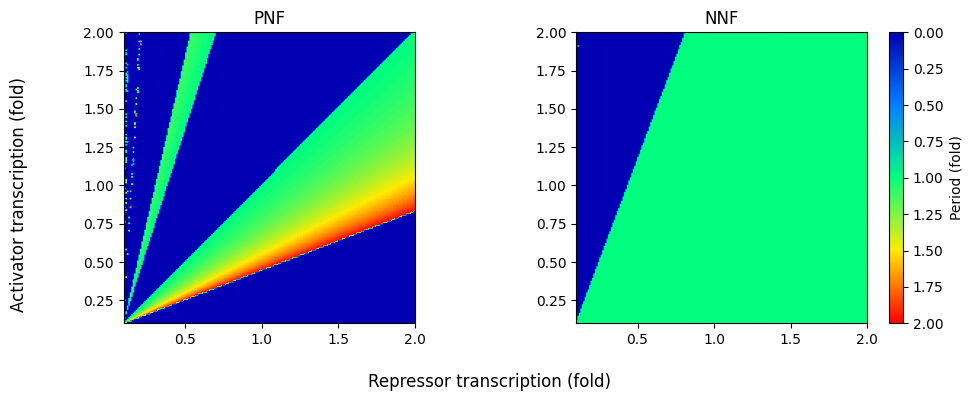

In [ ]:
# Define a custom colormap similar to the one in the provided image
colors = [(0, 0, 0.7), (0, 0.5, 1), (0, 1, 0.5), (1, 0.92, 0), (1, 0, 0)]  # RGB values for dark blue, blue, cyan, yellow, red
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
im1 = ax[0].imshow(PNF_periods, cmap=cmap, aspect='equal', extent=[0.1, 2, 0.1, 2], origin='lower', vmin=0, vmax=2)
im2 = ax[1].imshow(periods, cmap=cmap, aspect='equal', extent=[0.1, 2, 0.1, 2], origin='lower', vmin=0, vmax=2)

ax[0].set_title('PNF')
ax[1].set_title('NNF')

fig.supxlabel('Repressor transcription (fold)')
fig.supylabel('Activator transcription (fold)')
cbar = fig.colorbar(im2, ax=ax[1])

cbar.set_label('Period (fold)')
cbar.ax.invert_yaxis()  # Invert the y-axis of the color bar
plt.tight_layout()
plt.show()
